# Data cleaning

In [1]:
import pandas as pd
import re

plan:
* remove letters from height and weight
* make commas, periods consistent for height and weight

* separate metric and imperial
* convert imperial to metric > for height turn everything into inches and convert
* combine the two

* fill entries with no answer as N/A for now
* list all entries for weighted pulls, max pullups/chinups reps with length => 6
* if not too many then just change by individually reassigning
* otherwise figure out regex
* try using a language processing package to parse data from really long answers?

* calculate 1rm of pulls
* change to relative strength
* optional - calculate endurance rep max

* make a dummy variable column for each specific method in the final question

In [2]:
raw = pd.read_excel("The OAC_OAP survey (Responses).xlsx")

### splitting up metric and imperial data sets and doing some column rearrangement

In [3]:
raw.columns

Index(['Timestamp',
       'Metric (kg and centimetres) or Imperial (pounds and feet'inches)?',
       '(optional) In order to take part in the GORNATION Gymnastics Rings giveaway please type in why you should win the rings - 3 Funniest/Most creative answers win (PROVIDE EMAIL ADRESS FOR CONTACT)',
       'Height in centimeters (example answer: 175)',
       'Weight in kilograms (example answer: 70)',
       'Upper arm length in centimeters (optional - please be strict)',
       'Do you do mainly do weighted pull ups or chin ups?',
       'Please enter your rep max and weight of your weighted pull in format: axb (a = weight, b = rep max). Ex: 1rm at 90kg = 90x1, 3rm at 70kg = 70x3 and 5rm at 30kg = 30x5. Good form, full range of motion counts',
       'What is your max number of unweighted pull ups / chinups you can do? (example answer: 20 chin ups). Put in N/A if you don't know.',
       'Can you do One Arm Chin Up or a One Arm Pull Up',
       'What is your total specific training ti

In [4]:
metric = raw.iloc[:,3:12]
metric.columns

Index(['Height in centimeters (example answer: 175)',
       'Weight in kilograms (example answer: 70)',
       'Upper arm length in centimeters (optional - please be strict)',
       'Do you do mainly do weighted pull ups or chin ups?',
       'Please enter your rep max and weight of your weighted pull in format: axb (a = weight, b = rep max). Ex: 1rm at 90kg = 90x1, 3rm at 70kg = 70x3 and 5rm at 30kg = 30x5. Good form, full range of motion counts',
       'What is your max number of unweighted pull ups / chinups you can do? (example answer: 20 chin ups). Put in N/A if you don't know.',
       'Can you do One Arm Chin Up or a One Arm Pull Up',
       'What is your total specific training time for OAC/OAP in frequency per week and years of training? Please enter in format: a/b (a = number of times per week, b = number of years). Ex: 2x per week for 3 years = 2/3',
       'What has personally helped you with progressing / achieving your OAC or OAP? If you couldn't elaborate on your trai

In [5]:
imperial = raw.iloc[:,12:22]
imperial.columns

Index(['Height in feet'inches(example answer: 5'8)',
       'Weight in lbs (example answer: 150)',
       'Upper arm length in inches (optional - please be strict)',
       'Do you do mainly do weighted pull ups or chin ups?.1',
       'Please enter your rep max and weight of your weighted pull in format: axb (a = weight, b = rep max). Ex: 1rm at 90lbs = 90x1, 3rm at 70lbs = 70x3 and 5rm at 30lbs = 30x5. Good form, full range of motion counts',
       'What is your max number of unweighted pull ups / chin ups you can do? (example answer: 20 chin ups)',
       'Can you do One Arm Chin Up or a One Arm Pull Up.1',
       'What is your total specific training time for OAC/OAP in frequency per week and years of training? Please enter in format: a/b (a = number of times per week, b = number of years). Ex: 2x per week for 3 years = 2/3.1',
       'What has personally helped you with progressing / achieving your OAC or OAP? If you couldn't elaborate on your training in the previous question ab

In [6]:
col_names = ["height","weight","upper_arm_length","pull_style",
             "weight_x_repmax","max_pulls","oac_ability",
             "specific_training_time","best_contribution_to_oac"]

In [7]:
metric.columns = col_names
metric.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."
3,190,80,14,Weighted pull up,25x1,10,I can't do neither (no slow negatives / Bad fo...,2/1,Weighted pull ups/chin ups
4,172,68,NaN,Weighted chin up,40x2,18,I can't do neither (no slow negatives / Bad fo...,1/0,NaN


In [8]:
metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130 entries, 0 to 1129
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   height                    945 non-null    object
 1   weight                    945 non-null    object
 2   upper_arm_length          406 non-null    object
 3   pull_style                945 non-null    object
 4   weight_x_repmax           944 non-null    object
 5   max_pulls                 883 non-null    object
 6   oac_ability               945 non-null    object
 7   specific_training_time    937 non-null    object
 8   best_contribution_to_oac  841 non-null    object
dtypes: object(9)
memory usage: 79.6+ KB


In [9]:
metric = metric.dropna(axis=0,how='all')
metric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1129
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   height                    945 non-null    object
 1   weight                    945 non-null    object
 2   upper_arm_length          406 non-null    object
 3   pull_style                945 non-null    object
 4   weight_x_repmax           944 non-null    object
 5   max_pulls                 883 non-null    object
 6   oac_ability               945 non-null    object
 7   specific_training_time    937 non-null    object
 8   best_contribution_to_oac  841 non-null    object
dtypes: object(9)
memory usage: 73.8+ KB


In [10]:
col_names.append("max_pulls1")
col_names

['height',
 'weight',
 'upper_arm_length',
 'pull_style',
 'weight_x_repmax',
 'max_pulls',
 'oac_ability',
 'specific_training_time',
 'best_contribution_to_oac',
 'max_pulls1']

In [11]:
imperial.columns = col_names
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,max_pulls1
0,NaN,NaN,Eric's test response (can be included into ana...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
imperial = imperial.dropna(axis=0,how="all")
imperial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    185 non-null    object 
 1   weight                    185 non-null    float64
 2   upper_arm_length          68 non-null     object 
 3   pull_style                185 non-null    object 
 4   weight_x_repmax           185 non-null    object 
 5   max_pulls                 3 non-null      float64
 6   oac_ability               185 non-null    object 
 7   specific_training_time    183 non-null    object 
 8   best_contribution_to_oac  174 non-null    object 
 9   max_pulls1                151 non-null    object 
dtypes: float64(2), object(8)
memory usage: 16.0+ KB


In [13]:
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,max_pulls1
0,NaN,NaN,Eric's test response (can be included into ana...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,6'1,175.0,NaN,Weighted chin up,40x3,10.0,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups",NaN
18,5'6,135.0,13.1 inches,I do both and they are equally strong in my ca...,55x7,31.0,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin...",NaN
25,5'7,134.0,NaN,Weighted chin up,65x1,22.0,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi...",NaN
52,6'0,180.0,NaN,Weighted pull up,90x1,NaN,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl...",13 pull-ups


In [14]:
imperial = imperial.iloc[1:]
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,max_pulls1
17,6'1,175.0,NaN,Weighted chin up,40x3,10.0,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups",NaN
18,5'6,135.0,13.1 inches,I do both and they are equally strong in my ca...,55x7,31.0,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin...",NaN
25,5'7,134.0,NaN,Weighted chin up,65x1,22.0,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi...",NaN
52,6'0,180.0,NaN,Weighted pull up,90x1,NaN,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl...",13 pull-ups
53,5'10,170.0,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,NaN,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin...",12 chin 11 pull ups


In [15]:
imperial.at[17,"max_pulls1"] = 10.0
imperial.at[18,"max_pulls1"] = 31.0
imperial.at[25,"max_pulls1"] = 22.0
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,max_pulls1
17,6'1,175.0,NaN,Weighted chin up,40x3,10.0,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups",10.0
18,5'6,135.0,13.1 inches,I do both and they are equally strong in my ca...,55x7,31.0,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin...",31.0
25,5'7,134.0,NaN,Weighted chin up,65x1,22.0,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi...",22.0
52,6'0,180.0,NaN,Weighted pull up,90x1,NaN,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl...",13 pull-ups
53,5'10,170.0,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,NaN,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin...",12 chin 11 pull ups


In [16]:
col_names[5] = "max_pulls1"
col_names[-1] = "max_pulls"
col_names

['height',
 'weight',
 'upper_arm_length',
 'pull_style',
 'weight_x_repmax',
 'max_pulls1',
 'oac_ability',
 'specific_training_time',
 'best_contribution_to_oac',
 'max_pulls']

In [17]:
imperial = imperial[col_names]

In [19]:
imperial = imperial.drop(columns=["max_pulls"])
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls1,oac_ability,specific_training_time,best_contribution_to_oac
17,6'1,175.0,NaN,Weighted chin up,40x3,10.0,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
18,5'6,135.0,13.1 inches,I do both and they are equally strong in my ca...,55x7,31.0,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
25,5'7,134.0,NaN,Weighted chin up,65x1,22.0,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
52,6'0,180.0,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
53,5'10,170.0,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [22]:
new_cols = col_names[:9]
new_cols[5] = "max_pulls"
new_cols

['height',
 'weight',
 'upper_arm_length',
 'pull_style',
 'weight_x_repmax',
 'max_pulls',
 'oac_ability',
 'specific_training_time',
 'best_contribution_to_oac']

In [23]:
imperial.columns = new_cols
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
17,6'1,175.0,NaN,Weighted chin up,40x3,10.0,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
18,5'6,135.0,13.1 inches,I do both and they are equally strong in my ca...,55x7,31.0,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
25,5'7,134.0,NaN,Weighted chin up,65x1,22.0,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
52,6'0,180.0,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
53,5'10,170.0,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [24]:
metric.to_excel("metric_data.xlsx",index=False)
imperial.to_excel("imperial_data.xlsx",index=False)

### height, weight cleaning and conversion to metric for the imperial unit data set

In [2]:
import re

In [90]:
imperial = pd.read_excel("imperial_data.xlsx")

In [91]:
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,6'1,175,NaN,Weighted chin up,40x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,5'6,135,13.1 inches,I do both and they are equally strong in my ca...,55x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,5'7,134,NaN,Weighted chin up,65x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,6'0,180,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,5'10,170,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [92]:
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace('”',''))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace(' ',''))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace('ft',"'"))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace('inches',''))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace('(',''))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace(')',''))
imperial["height"] = imperial["height"].apply(lambda x: str(x).replace('"',''))
imperial["height"] = imperial["height"].apply(lambda x: x+"'0" if (len(x)==1) else x)
imperial["height"] = imperial["height"].apply(lambda x: x.replace(".","'") if (x[1]==".") else x)
imperial["height"] = imperial["height"].apply(lambda x: x[:-1] if (x[-1]=="'") else x)
imperial["height"] = imperial["height"].apply(lambda x: x[:-1] if (x[-1]=="’") else x)
imperial["height"] = imperial["height"].apply(lambda x: x.replace('’',"'"))

In [112]:
num = "510"
print(re.match(r"(\d'\d+(.\d+)?)",num)==None)

True


In [113]:
test = lambda x : x[0]+"'"+x[1:] if(re.match(r"(\d'\d(.\d+)?)",x)==None) else x
print(test(num))

5'10


In [114]:
print(test("5'10"))

5'10


In [115]:
imperial["height"] = imperial["height"].apply(lambda x : x[0]+"'"+x[1:] if(re.match(r"(\d'\d(.\d+)?)",x)==None) else x)

In [116]:
imperial["height"] = imperial["height"].str.extract(r"(\d'\d(.\d+)?)")

In [118]:
imperial.to_excel("imperial_data.xlsx",index=False)

In [133]:
imperial = pd.read_excel("imperial_data.xlsx")

In [134]:
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,6'1,175,NaN,Weighted chin up,40x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,5'6,135,13.1 inches,I do both and they are equally strong in my ca...,55x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,5'7,134,NaN,Weighted chin up,65x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,6'0,180,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,5'1,170,14'' 16'' a guess,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [135]:
imperial.at[4,"upper_arm_length"] = '15"'
imperial.at[42,"upper_arm_length"] = '18"'
imperial.at[73,"upper_arm_length"] = '12"'

In [136]:
imperial.at[170,"upper_arm_length"] = '14"'

In [138]:
imperial["upper_arm_length"] = imperial["upper_arm_length"].apply(lambda x: str(x).replace(" ",""))

In [139]:
imperial["upper_arm_length"] = imperial["upper_arm_length"].str.extract(r"(\d+(.\d+)?)")

In [141]:
imperial.to_excel("imperial_data.xlsx",index=False)

In [159]:
imperial = pd.read_excel("imperial_data.xlsx")

In [160]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: str(x).replace(" ",""))
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: str(x).replace("at","@"))

In [161]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: str(x).replace("repmax","rm"))
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: str(x).replace("of","@"))

In [162]:
imperial.tail(20)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
165,6'0,153,NaN,Weighted pull up,IhardlydoweightedpullupssoIdonotknow.,12,I can't do neither (no slow negatives / Bad fo...,I do not actively train for the OAC/OAP at thi...,Eccentrics / Negatives
166,5'1,165,NaN,Did weighted work in the past. Haven’t in a ye...,0x0,>20 (haven’t tested in a while),I can do multiple slow OAC/OAP negatives / Bad...,1.5/1,"Eccentrics / Negatives, Mixed grip / Mantle ch..."
167,5'9,155,NaN,Weighted pull up,90x2,18 pullups,I can do 1 slow OAC/OAP negative,0,Weighted pull ups/chin ups
168,5'1,150,14.0,Weighted pull up,1rm@100lbs.5rm@65lbs,20 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,About half a year 3x a week,Pulley system assisted
169,5'3,150,NaN,I do both,100lbs,28 pullups,I can do a One Arm Pull Up (full ROM - pronated),1/2,"Eccentrics / Negatives, Band assisted, Lockoffs"
170,5'1,118,14.0,I don't do and haven't ever done weighted pull...,0,15 pull ups and 20 chin ups,I can do multiple slow OAC/OAP negatives / Bad...,2/1,Band assisted
171,6'0,185,NaN,"I used to do weighted chins, lost gym access.",185x120,30,I can do 1 slow OAC/OAP negative,2x1,Climber's approach (holding your arm with seco...
172,5'7,160,NaN,Weighted pull up,"135x1,90x13,70x15,45x18",30 Pull ups,I can do a One Arm Pull Up (full ROM - pronated),1-2 times per week for 6 years,"Eccentrics / Negatives, Weighted pull ups/chin..."
173,5'1,155,NaN,Weighted pull up,115x1100x390x5,37,I can do both (full ROM),1/2,Attempts
174,5'7,155,NaN,Weighted pull up,1rm@160lbs,30-35,I can do both (full ROM),2-3x per week,"Eccentrics / Negatives, Band assisted"


In [163]:
imperial.at[173,"weight_x_repmax"] = "115x1"
imperial.at[184,"weight_x_repmax"] = "115x1"
imperial.at[168,"weight_x_repmax"] = "100x1"
imperial.at[172,"weight_x_repmax"] = "135x1"

##### honestly kinda feels like bad practice when I use df.at[] but like wow the range of different patterns I have to account for in the regex is kinda overwhelming

In [164]:
imperial.at[100,"weight_x_repmax"] = "70x1"
imperial.at[101,"weight_x_repmax"] = "115x1"
imperial.at[103,"weight_x_repmax"] = "75x2"
imperial.at[118,"weight_x_repmax"] = "135x1"
imperial.at[142,"weight_x_repmax"] = "100x1"
imperial.at[146,"weight_x_repmax"] = "90x1"
imperial.at[153,"weight_x_repmax"] = "80x1"
imperial.at[165,"weight_x_repmax"] = "0x0"

In [166]:
imperial.tail()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
180,6'1,165,NaN,Weighted pull up,88x1,20,I can do 1 slow OAC/OAP negative,I’ve only played around with it mainly holding...,Band assisted
181,5'7,125,5.0,I don't do and haven't ever done weighted pull...,zweebop,zezezeee,I never attempted neither of them,waawa,Partial reps
182,5'1,154,NaN,Weighted pull up,85x1,15,I never attempted neither of them,1/1,NaN
183,5'1,150,NaN,Weighted pull up,75x3,15,I can't do neither (no slow negatives / Bad fo...,0,NaN
184,5'1,170,14.0,Weighted pull up,115x1,20 pullups,I can do a One Arm Chin Up (full ROM - supinat...,2/5,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [167]:
imperial = imperial.drop([181])
imperial.tail()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
179,6'0,150,NaN,Weighted pull up,45x4,21,I can't do neither (no slow negatives / Bad fo...,1/2,Climber's approach (holding your arm with seco...
180,6'1,165,NaN,Weighted pull up,88x1,20,I can do 1 slow OAC/OAP negative,I’ve only played around with it mainly holding...,Band assisted
182,5'1,154,NaN,Weighted pull up,85x1,15,I never attempted neither of them,1/1,NaN
183,5'1,150,NaN,Weighted pull up,75x3,15,I can't do neither (no slow negatives / Bad fo...,0,NaN
184,5'1,170,14.0,Weighted pull up,115x1,20 pullups,I can do a One Arm Chin Up (full ROM - supinat...,2/5,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [170]:
imperial.to_excel("test.xlsx")

In [171]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: str(x).replace("=","@"))
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: x.lower())

In [176]:
test = lambda x : x.split("@")[1]+"x"+x.split("@")[0] if("@" in x) else x
print(test("1rm@135lbs").replace('rm','').replace('lbs',''))

135x1


In [177]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x : x.split("@")[1]+"x"+x.split("@")[0] if("@" in x) else x)
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: x.replace('rm','').replace('lbs',''))

In [184]:
imperial.to_excel("test.xlsx")

In [183]:
imperial.at[5,"weight_x_repmax"] = "80x1"
imperial.at[6,"weight_x_repmax"] = "90x1"
imperial.at[87,"weight_x_repmax"] = "0x0"
imperial.at[164,"weight_x_repmax"] = "80x6"
imperial.at[169,"weight_x_repmax"] = "100x1"
imperial.at[170,"weight_x_repmax"] = "0x0"
imperial.at[171,"weight_x_repmax"] = "185x12"
imperial = imperial.drop([185])

In [185]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: x.replace('lb',''))

In [188]:
imperial["height"] = imperial["height"].apply(lambda x: (float(x.split("'")[0])*12+float(x.split("'")[1]))*2.54)
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,185.42,175.0,NaN,Weighted chin up,40x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,167.64,135.0,13.1,I do both and they are equally strong in my ca...,55x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,170.18,134.0,NaN,Weighted chin up,65x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,182.88,180.0,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,154.94,170.0,15.0,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [189]:
imperial["weight"] = imperial["weight"].apply(lambda x: float(x)*0.453592)
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,185.42,79.378600,NaN,Weighted chin up,40x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,167.64,61.234920,13.1,I do both and they are equally strong in my ca...,55x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,170.18,60.781328,NaN,Weighted chin up,65x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,182.88,81.646560,NaN,Weighted pull up,90x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,154.94,77.110640,15.0,I do both and they are equally strong in my ca...,15x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [192]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: x.replace("na","0x0"))

In [194]:
imperial.at[110,"weight_x_repmax"] = "30x5"

In [195]:
imperial["weight_x_repmax"] = imperial["weight_x_repmax"].apply(lambda x: (str(float(x.split("x")[0])*0.453592)
                                                                               +"x"
                                                                               +x.split("x")[1]))
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,185.42,79.378600,NaN,Weighted chin up,18.14368x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,167.64,61.234920,13.1,I do both and they are equally strong in my ca...,24.94756x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,170.18,60.781328,NaN,Weighted chin up,29.48348x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,182.88,81.646560,NaN,Weighted pull up,40.82328x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,154.94,77.110640,15.0,I do both and they are equally strong in my ca...,6.8038799999999995x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [201]:
imperial["upper_arm_length"] = imperial["upper_arm_length"].apply(lambda x: float(x)*2.54)
imperial.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,185.42,79.378600,NaN,Weighted chin up,18.14368x3,10,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Archer pull ups"
1,167.64,61.234920,33.274,I do both and they are equally strong in my ca...,24.94756x7,31,I can do a One Arm Chin Up (full ROM - supinat...,1/1,"Eccentrics / Negatives, Weighted pull ups/chin..."
2,170.18,60.781328,NaN,Weighted chin up,29.48348x1,22,I can't do neither (no slow negatives / Bad fo...,1/1,"Weighted pull ups/chin ups, Pulley system assi..."
3,182.88,81.646560,NaN,Weighted pull up,40.82328x1,13 pull-ups,I can't do neither (no slow negatives / Bad fo...,2/1,"Weighted pull ups/chin ups, Mixed grip / Mantl..."
4,154.94,77.110640,38.100,I do both and they are equally strong in my ca...,6.8038799999999995x3,12 chin 11 pull ups,I can do a One Arm Chin Up (full ROM - supinat...,2/1,"Eccentrics / Negatives, Weighted pull ups/chin..."


In [202]:
imperial.to_excel("metric_converted.xlsx",index=False)

In [203]:
dataframes = [metric,imperial]
combined = pd.concat(dataframes)
combined = combined.reset_index(drop=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   height                    1129 non-null   object
 1   weight                    1129 non-null   object
 2   upper_arm_length          470 non-null    object
 3   pull_style                1129 non-null   object
 4   weight_x_repmax           1128 non-null   object
 5   max_pulls                 1036 non-null   object
 6   oac_ability               1129 non-null   object
 7   specific_training_time    1119 non-null   object
 8   best_contribution_to_oac  1014 non-null   object
dtypes: object(9)
memory usage: 79.5+ KB


In [204]:
combined.to_excel("combined v1.xlsx",index=False)

#### realised I need to clean metric height,weight units before combining the two

In [49]:
metric = pd.read_excel("metric_data.xlsx")

In [50]:
metric.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."
3,190,80,14,Weighted pull up,25x1,10,I can't do neither (no slow negatives / Bad fo...,2/1,Weighted pull ups/chin ups
4,172,68,NaN,Weighted chin up,40x2,18,I can't do neither (no slow negatives / Bad fo...,1/0,NaN


#### for some reason '\w+' doesn't work and I had to use '[a-zA-Z]+'
#### wish I'd known about this sooner when I was working with imperial data smh

In [51]:
metric["height"] = metric["height"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))
metric["weight"] = metric["weight"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))
metric["height"] = metric["height"].apply(lambda x: x.replace(",","."))
metric["weight"] = metric["weight"].apply(lambda x: x.replace(",","."))
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))

#### trying to parse the proper format out of the responses are a nightmare
#### I regret removing input validation
#### time to git gud

In [52]:
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("at","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("~","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("=","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("*","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("×","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("@","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("with","x"))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("rm",""))
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace("kg",""))

In [53]:
metric["weight_x_repmax"] = metric["weight_x_repmax"].apply(lambda x: str(x).replace(" ",""))

patterns to find
* \d{2}x\d{1}
* \d{2}x\d{2}
* \d{3}x\d{1}
* \d{3}x\d{2}
* \d{1}x\d{2}
* \d{1}x\d{2}

In [54]:
metric["wxr_pattern1"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{2}x\d{1}',str(x))))
metric["wxr_pattern2"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{2}x\d{2}',str(x))))
metric["wxr_pattern3"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{3}x\d{1}',str(x))))
metric["wxr_pattern4"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{3}x\d{2}',str(x))))
metric["wxr_pattern5"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{1}x\d{1}',str(x))))
metric["wxr_pattern6"] = metric["weight_x_repmax"].apply(lambda x: ",".join(re.findall('\d{1}x\d{2}',str(x))))

* merge the rows(separate by commas)
* split by commas to get a list of weight x rep
* compare the weight for each element in the list
* take the largest's index and use that weight x rep as the true value

In [46]:
metric.to_excel("test.xlsx")

In [8]:
arr1 = ["20x1","120x1"]
arr2 = ["3x4","3x45"]

In [15]:
temp = [i.split("x") for i in arr2] #gives list of lists
print(temp)
temp = [int(i) for sublist in temp for i in sublist] # flattens the previous list
print(temp)
max_num = str(max(temp)) #finds the max number
print(max_num)
max_rm = [i for i in arr2 if max_num in i][0] #finds the maximum weight x rep max
print(max_rm)

[['3', '4'], ['3', '45']]
[3, 4, 3, 45]
45
3x45


In [55]:
metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   height                    945 non-null    object
 1   weight                    945 non-null    object
 2   upper_arm_length          945 non-null    object
 3   pull_style                945 non-null    object
 4   weight_x_repmax           945 non-null    object
 5   max_pulls                 883 non-null    object
 6   oac_ability               945 non-null    object
 7   specific_training_time    937 non-null    object
 8   best_contribution_to_oac  841 non-null    object
 9   wxr_pattern1              945 non-null    object
 10  wxr_pattern2              945 non-null    object
 11  wxr_pattern3              945 non-null    object
 12  wxr_pattern4              945 non-null    object
 13  wxr_pattern5              945 non-null    object
 14  wxr_pattern6              

In [56]:
wxr = metric.iloc[:,9:]
wxr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   wxr_pattern1  945 non-null    object
 1   wxr_pattern2  945 non-null    object
 2   wxr_pattern3  945 non-null    object
 3   wxr_pattern4  945 non-null    object
 4   wxr_pattern5  945 non-null    object
 5   wxr_pattern6  945 non-null    object
dtypes: object(6)
memory usage: 44.4+ KB


In [57]:
wxr = wxr.replace(r'^\s*$',"0x0",regex=True)
wxr = wxr.fillna("0x0")

In [58]:
wxr.head()

,wxr_pattern1,wxr_pattern2,wxr_pattern3,wxr_pattern4,wxr_pattern5,wxr_pattern6
0,51x1,0x0,0x0,0x0,1x1,0x0
1,0x0,0x0,0x0,0x0,0x0,0x0
2,75x1,0x0,0x0,0x0,5x1,0x0
3,25x1,0x0,0x0,0x0,5x1,0x0
4,40x2,0x0,0x0,0x0,0x2,0x0


In [59]:
wxr["combined"] = wxr[["wxr_pattern1","wxr_pattern2","wxr_pattern3","wxr_pattern4","wxr_pattern5","wxr_pattern6"]].agg(','.join,axis=1)

In [60]:
wxr.head()

,wxr_pattern1,wxr_pattern2,wxr_pattern3,wxr_pattern4,wxr_pattern5,wxr_pattern6,combined
0,51x1,0x0,0x0,0x0,1x1,0x0,"51x1,0x0,0x0,0x0,1x1,0x0"
1,0x0,0x0,0x0,0x0,0x0,0x0,"0x0,0x0,0x0,0x0,0x0,0x0"
2,75x1,0x0,0x0,0x0,5x1,0x0,"75x1,0x0,0x0,0x0,5x1,0x0"
3,25x1,0x0,0x0,0x0,5x1,0x0,"25x1,0x0,0x0,0x0,5x1,0x0"
4,40x2,0x0,0x0,0x0,0x2,0x0,"40x2,0x0,0x0,0x0,0x2,0x0"


In [61]:
wxr["combined"] = wxr["combined"].apply(lambda x: x.split(","))
wxr["step1"] = wxr["combined"].apply(lambda x: [i.split("x") for i in x])
wxr["step2"] = wxr["step1"].apply(lambda x: [int(i) for sublist in x for i in sublist])
wxr["step3"] = wxr["step2"].apply(lambda x: str(max(x)))

In [62]:
# think I may have to use iterrows or some other iterating method smh
max_wxr = []
for i in wxr.index:
    arr = wxr["combined"][i]
    max_num = wxr["step3"][i]
    final = [i for i in arr if max_num in i][0]
    max_wxr.append(final)

wxr["wxr"] = max_wxr

### will have to ask how you can do this with apply(lambda x: bla blah) method

In [63]:
wxr.head()

,wxr_pattern1,wxr_pattern2,wxr_pattern3,wxr_pattern4,wxr_pattern5,wxr_pattern6,combined,step1,step2,step3,wxr
0,51x1,0x0,0x0,0x0,1x1,0x0,"[51x1, 0x0, 0x0, 0x0, 1x1, 0x0]","[[51, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0]]","[51, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]",51,51x1
1,0x0,0x0,0x0,0x0,0x0,0x0,"[0x0, 0x0, 0x0, 0x0, 0x0, 0x0]","[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0x0
2,75x1,0x0,0x0,0x0,5x1,0x0,"[75x1, 0x0, 0x0, 0x0, 5x1, 0x0]","[[75, 1], [0, 0], [0, 0], [0, 0], [5, 1], [0, 0]]","[75, 1, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0]",75,75x1
3,25x1,0x0,0x0,0x0,5x1,0x0,"[25x1, 0x0, 0x0, 0x0, 5x1, 0x0]","[[25, 1], [0, 0], [0, 0], [0, 0], [5, 1], [0, 0]]","[25, 1, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0]",25,25x1
4,40x2,0x0,0x0,0x0,0x2,0x0,"[40x2, 0x0, 0x0, 0x0, 0x2, 0x0]","[[40, 2], [0, 0], [0, 0], [0, 0], [0, 2], [0, 0]]","[40, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]",40,40x2


In [64]:
metric = pd.read_excel("metric_data.xlsx")

In [65]:
metric["wxr"] = max_wxr
#metric = metric.drop(columns=["wxr_pattern1","wxr_pattern2","wxr_pattern3","wxr_pattern4","wxr_pattern5","wxr_pattern6"])
metric.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,wxr
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol...",51x1
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN,0x0
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho...",75x1
3,190,80,14,Weighted pull up,25x1,10,I can't do neither (no slow negatives / Bad fo...,2/1,Weighted pull ups/chin ups,25x1
4,172,68,NaN,Weighted chin up,40x2,18,I can't do neither (no slow negatives / Bad fo...,1/0,NaN,40x2


In [21]:
metric.to_excel("temp.xlsx")

### I know I could just roll with the stuff I extracted but I'm looking over the data since it's a small data set
### Idk if you can fix thru pandas
### I want this to be 100% accurate
### will make sure to do better data validation in the collecting stage next time

### the poorly extracted data: 59 total rows smh
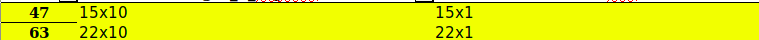
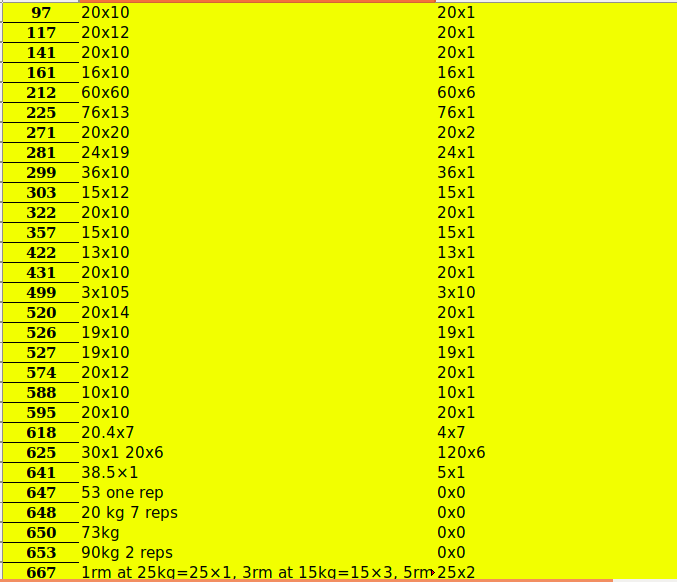
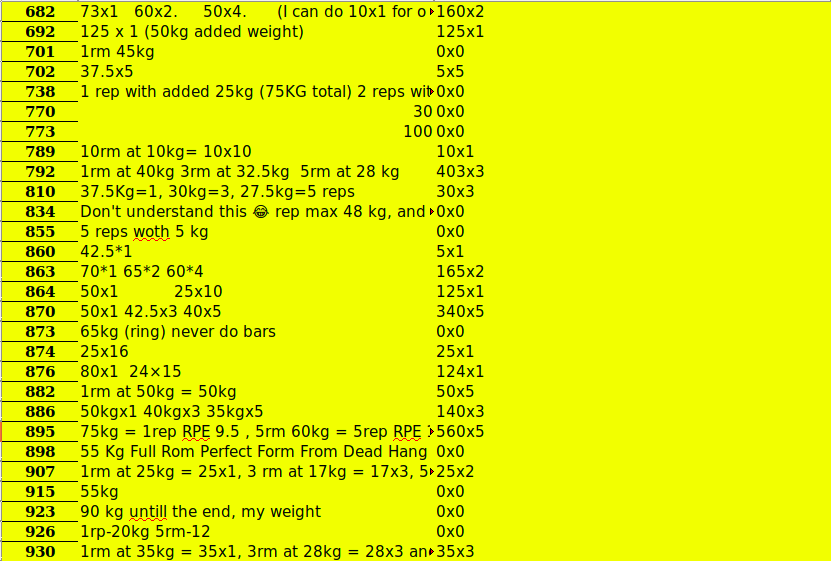

In [66]:
#There's probably a smart way like dropping columns or fancy regex but I do need to get this done
#smh I hate myself
metric.at[47,'wxr']='15x10'
metric.at[63,'wxr']='22x10'
metric.at[97,'wxr']='20x10'
metric.at[117,'wxr']='20x12'
metric.at[141,'wxr']='20x10'
metric.at[161,'wxr']='16x10'
metric.at[212,'wxr']='60x60'
metric.at[225,'wxr']='76x13'
metric.at[271,'wxr']='20x20'
metric.at[281,'wxr']='24x19'
metric.at[299,'wxr']='36x10'
metric.at[303,'wxr']='15x12'
metric.at[322,'wxr']='20x10'
metric.at[357,'wxr']='15x10'
metric.at[422,'wxr']='13x10'
metric.at[431,'wxr']='20x10'
metric.at[499,'wxr']='3x105'
metric.at[520,'wxr']='20x14'
metric.at[526,'wxr']='19x10'
metric.at[527,'wxr']='19x10'
metric.at[574,'wxr']='20x12'
metric.at[588,'wxr']='10x10'
metric.at[595,'wxr']='20x10'
metric.at[618,'wxr']='20.4x7'
metric.at[625,'wxr']='30x1'
metric.at[641,'wxr']='38.5×1'
metric.at[647,'wxr']='53x1'
metric.at[648,'wxr']='20x7'
metric.at[650,'wxr']='73x1'
metric.at[653,'wxr']='90x2'
metric.at[667,'wxr']='25x1'
metric.at[675,'wxr']='75x1'
metric.at[682,'wxr']='73x1'
metric.at[692,'wxr']='50x1'
metric.at[701,'wxr']='45x1'
metric.at[702,'wxr']='37.5x5'
metric.at[738,'wxr']='25x1'
metric.at[770,'wxr']='30x1'
metric.at[773,'wxr']='100x1'
metric.at[789,'wxr']='10x10'
metric.at[792,'wxr']='40x1'
metric.at[810,'wxr']='37.5x1'
metric.at[834,'wxr']='48x1'
metric.at[855,'wxr']='5x5'
metric.at[860,'wxr']='42.5x1'
metric.at[863,'wxr']='70x1'
metric.at[864,'wxr']='50x1'
metric.at[870,'wxr']='50x1'
metric.at[873,'wxr']='65x1'
metric.at[874,'wxr']='25x16'
metric.at[876,'wxr']='80x1'
metric.at[882,'wxr']='50x1'
metric.at[886,'wxr']='50x1'
metric.at[895,'wxr']='75x1'
metric.at[898,'wxr']='55x1'
metric.at[907,'wxr']='25x1'
metric.at[915,'wxr']='55x1'
metric.at[923,'wxr']='90x1'
metric.at[926,'wxr']='20x1'
metric.at[930,'wxr']='35x1'

In [67]:
metric.head(3)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,wxr
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol...",51x1
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN,0x0
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho...",75x1


In [71]:
cols = list(metric.columns)
wxr = cols.pop()
cols.insert(5,wxr)
metric = metric[cols]
metric.head(3)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,wxr,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180,84,38,Weighted pull up,51x1,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168,55,NaN,Weighted pull up,75x1,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [72]:
metric = metric.drop(columns=["weight_x_repmax"])
metric.head(3)

,height,weight,upper_arm_length,pull_style,wxr,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [74]:
new_cols = list(metric.columns)
new_cols[4] = "weight_x_repmax"
metric.columns = new_cols
metric.head(3)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180,84,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192,78,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168,55,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [85]:
metric.to_excel("almost_done.xlsx",index=False)

In [77]:
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: str(x).replace(",","."))
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))

In [80]:
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: re.sub('\s+','',str(x)))
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: str(x).replace("(","."))
metric["upper_arm_length"] = metric["upper_arm_length"].apply(lambda x: str(x).replace(")","."))

In [84]:
metric.at[72,'upper_arm_length'] = 36.5
metric.at[182,'upper_arm_length'] = 39
metric.at[733,'upper_arm_length'] = ''
metric.at[777,'upper_arm_length'] = 30
metric.at[785,'upper_arm_length'] = 32.5
metric.at[789,'upper_arm_length'] = 32.5
metric.at[898,'upper_arm_length'] = ''

In [86]:
imperial = pd.read_excel("metric_converted.xlsx")

In [87]:
dataframes = [metric,imperial]
combined = pd.concat(dataframes)
combined = combined.reset_index(drop=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   height                    1129 non-null   object
 1   weight                    1129 non-null   object
 2   upper_arm_length          1009 non-null   object
 3   pull_style                1129 non-null   object
 4   weight_x_repmax           1129 non-null   object
 5   max_pulls                 1036 non-null   object
 6   oac_ability               1129 non-null   object
 7   specific_training_time    1119 non-null   object
 8   best_contribution_to_oac  1014 non-null   object
dtypes: object(9)
memory usage: 79.5+ KB


In [98]:
combined = pd.read_excel("combined_v1.xlsx")

In [97]:
combined.to_excel("combined_v1.xlsx",index=False)

In [90]:
combined["height"] = combined["height"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))
combined["weight"] = combined["weight"].apply(lambda x: re.sub('[a-zA-Z]+','',str(x)))
combined["height"] = combined["height"].apply(lambda x: x.replace(",","."))
combined["weight"] = combined["weight"].apply(lambda x: x.replace(",","."))

In [94]:
combined["height"] = combined["height"].apply(lambda x: x.replace("*",""))
combined["weight"] = combined["weight"].apply(lambda x: x.replace("*",""))

In [96]:
combined["height"] = combined["height"].apply(lambda x: str(x).split("-")[0])
combined["weight"] = combined["weight"].apply(lambda x: str(x).split("-")[0])

In [123]:
backup = combined.copy()

In [103]:
combined["weight_x_repmax"] = combined["weight_x_repmax"].apply(lambda x: x.split("x")[1]+"x"+x.split("x")[0] if (re.match("\d{1}x\d{2}",x)!=None) else x)

In [116]:
combined["weight_x_repmax"] = combined["weight_x_repmax"].apply(lambda x: x.replace("×","x"))
combined["weight_x_repmax"] = combined["weight_x_repmax"].apply(lambda x: x.replace(",",""))

In [104]:
combined.to_excel("test.xlsx")

In [105]:
backup = combined.copy()

### using the Epely one rep max formula as provided by Frinksmovement
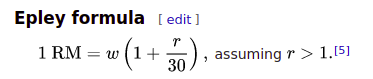

In [120]:
def orm(x):
    weight = x["weight"]
    wxr = x["weight_x_repmax"]
    added_weight = float(wxr.split("x")[0])
    reps = float(wxr.split("x")[1])
    orm = 0
    if weight*reps == 0.0:
        return orm
    elif reps == 1.0:
        orm = added_weight
        return orm
    else:
        orm = ((weight+added_weight)*(1+reps/30.0))-weight
        return orm

In [119]:
weight_wxr = combined[["weight","weight_x_repmax"]]
weight_wxr.head()

,weight,weight_x_repmax
0,84.0,51x1
1,78.0,0x0
2,55.0,75x1
3,80.0,25x1
4,68.0,40x2


In [121]:
orm = weight_wxr.apply(orm,axis=1)
orm.head()

0    51.0
1     0.0
2    75.0
3    25.0
4    47.2
dtype: float64

In [124]:
combined["orm"] = orm
combined.head()

,height,weight,upper_arm_length,pull_style,weight_x_repmax,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac,orm
0,180.0,84.0,38,Weighted pull up,51x1,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol...",51.0
1,192.0,78.0,NaN,I don't do and haven't ever done weighted pull...,0x0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN,0.0
2,168.0,55.0,NaN,Weighted pull up,75x1,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho...",75.0
3,190.0,80.0,14,Weighted pull up,25x1,10,I can't do neither (no slow negatives / Bad fo...,2/1,Weighted pull ups/chin ups,25.0
4,172.0,68.0,NaN,Weighted chin up,40x2,18,I can't do neither (no slow negatives / Bad fo...,1/0,NaN,47.2


In [125]:
cols = list(combined.columns)
one_rep_max = cols.pop()
cols.insert(5,one_rep_max)
combined = combined[cols]
combined.head(3)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180.0,84.0,38,Weighted pull up,51x1,51.0,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192.0,78.0,NaN,I don't do and haven't ever done weighted pull...,0x0,0.0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168.0,55.0,NaN,Weighted pull up,75x1,75.0,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [127]:
combined.to_excel("combined_v2.xlsx",index=False)

In [149]:
unique_pull_style = pd.unique(combined["pull_style"])
unique_pull_style

array(['Weighted pull up',
       "I don't do and haven't ever done weighted pull ups or chin ups (PUT 0 as 1RM BELOW)",
       'Weighted chin up',
       'I do both and they are equally strong in my case (1rm for both)',
       "I don't do and haven't ever done weighted pull ups or chin ups (PUT 0x0 as 1RM BELOW)",
       "Have done them a lot in the past but they haven't been in my routine for a long time. Next cycle! Next answer will be assumed level for current weighted pull-ups, though I have been stronger",
       'Ring Pull Ups (rings turning)', 'Do both but chu is stronger',
       'I tried once some months ago, i did 10 perfect form with 15kg',
       "I usually do weighted pull ups but since the start of the pandemic i couldn't do any, so the training for the oap was with body weight only but with a little base of weighted calistenics",
       "I do both. Majority would be pull based let's say 60%.",
       'Sometimes, only pull ups',
       'I sometimes do weighted pull ups 

In [148]:
combined = pd.read_excel("combined_v2.xlsx")

In [150]:
combined["pull_style"] = combined["pull_style"].apply(lambda x: "both" if("both" in x) else x)

In [156]:
combined.to_excel("test.xlsx")

In [152]:
combined["pull_style"] = combined["pull_style"].apply(lambda x: "wpu" if(x=='Weighted pull up') else x)
combined["pull_style"] = combined["pull_style"].apply(lambda x: "wcu" if(x=='Weighted chin up') else x)

In [153]:
combined["pull_style"] = combined["pull_style"].apply(lambda x: "none" if("don't do and haven't ever done" in x) else x)

In [154]:
combined["pull_style"] = combined["pull_style"].apply(lambda x: "rpu" if("ring" in x) else x)
combined["pull_style"] = combined["pull_style"].apply(lambda x: "rpu" if("rings" in x.lower()) else x)
combined["pull_style"] = combined["pull_style"].apply(lambda x: "npu" if("neutral" in x.lower()) else x)

In [155]:
unique_pull_style = pd.unique(combined["pull_style"])
unique_pull_style

array(['wpu', 'none', 'wcu', 'both',
       "Have done them a lot in the past but they haven't been in my routine for a long time. Next cycle! Next answer will be assumed level for current weighted pull-ups, though I have been stronger",
       'rpu',
       'I tried once some months ago, i did 10 perfect form with 15kg',
       "I usually do weighted pull ups but since the start of the pandemic i couldn't do any, so the training for the oap was with body weight only but with a little base of weighted calistenics",
       'Sometimes, only pull ups',
       'I sometimes do weighted pull ups and chin ups',
       'Mainly mixed grip chinups progressions',
       'Assisted one arm chinups ', 'Regular',
       'I did in the past, but not rn',
       'Stronger in w chin ups by about 10kg', 'npu',
       'In they past i have trained weighted pull UPS, but have not done it in the last year',
       'My focus is on front lever. I rarely do weighted pull ups. Once I pulled 3 reps with 60 kgs so 

### maybe counting the number of "pull" and "chin" in the response and taking the larger number as main pull style could work
### if equal number then "both"
### if one rep max is not 0 then default to "wpu"
### else default to "none"

In [195]:
pull_style = combined[["pull_style","orm"]]
pull_style.head()

,pull_style,orm
0,wpu,51.0
1,none,0.0
2,wpu,75.0
3,wpu,25.0
4,wcu,47.2


In [196]:
def parse_pull_style(x):
    pull_count = 0
    chin_count = 0
    answer = x["pull_style"].replace("-"," ")
    orm = x["orm"]
    
    for word in answer.split(" "):
        if word == "pull" or "pull" in word:
            pull_count += 1
    
    for word in answer.split(" "):
        if word == "chin" or "chin" in word:
            chin_count += 1
    
    if answer in ["wpu","wcu","npu","rpu","none","both"]:
        return answer
    elif orm == 0.0 or (pull_count==0.0 and chin_count==0.0):
        return "none"
    elif pull_count == chin_count:
        return "both"
    elif pull_count > chin_count:
        return "wpu"
    elif pull_count < chin_count:
        return "wcu"
    else:
        return "none"

In [197]:
style = pull_style.apply(parse_pull_style,axis=1)
style.head()

0     wpu
1    none
2     wpu
3     wpu
4     wcu
dtype: object

In [198]:
combined["ps"] = style
combined.head(3)

,height,weight,upper_arm_length,ps,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180.0,84.0,38,wpu,wpu,51x1,51.0,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192.0,78.0,NaN,none,none,0x0,0.0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168.0,55.0,NaN,wpu,wpu,75x1,75.0,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [166]:
cols = list(combined.columns)
pull_style = cols.pop()
cols.insert(3,pull_style)
combined = combined[cols]
combined.head(3)

,height,weight,upper_arm_length,ps,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180.0,84.0,38,wpu,wpu,51x1,51.0,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192.0,78.0,NaN,none,none,0x0,0.0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168.0,55.0,NaN,wpu,wpu,75x1,75.0,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [200]:
combined = combined.drop(columns=["pull_style"])
combined.head()

,height,weight,upper_arm_length,ps,weight_x_repmax,orm,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180.0,84.0,38,wpu,51x1,51.0,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192.0,78.0,NaN,none,0x0,0.0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168.0,55.0,NaN,wpu,75x1,75.0,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."
3,190.0,80.0,14,wpu,25x1,25.0,10,I can't do neither (no slow negatives / Bad fo...,2/1,Weighted pull ups/chin ups
4,172.0,68.0,NaN,wcu,40x2,47.2,18,I can't do neither (no slow negatives / Bad fo...,1/0,NaN


In [206]:
cols = ','.join(list(combined.columns)).replace("ps","pull_style").split(',')
cols

['height',
 'weight',
 'upper_arm_length',
 'pull_style',
 'weight_x_repmax',
 'orm',
 'max_pulls',
 'oac_ability',
 'specific_training_time',
 'best_contribution_to_oac']

In [207]:
combined.columns = cols
combined.head(3)

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,specific_training_time,best_contribution_to_oac
0,180.0,84.0,38,wpu,51x1,51.0,NaN,I can do 1 slow OAC/OAP negative,2/2,"Partial reps, Pulley system assisted, High vol..."
1,192.0,78.0,NaN,none,0x0,0.0,12,I can't do neither (no slow negatives / Bad fo...,0/0,NaN
2,168.0,55.0,NaN,wpu,75x1,75.0,18,I can do multiple slow OAC/OAP negatives / Bad...,2/1,"Eccentrics / Negatives, Climber's approach (ho..."


In [216]:
combined.to_excel("combined_v2.xlsx",index=False)

In [209]:
oac_ability = pd.unique(combined["oac_ability"])
oac_ability

array(['I can do 1 slow OAC/OAP negative',
       "I can't do neither (no slow negatives / Bad form rep)",
       'I can do multiple slow OAC/OAP negatives / Bad form rep (little kip/half ROM)',
       'I never attempted neither of them',
       'I can do a One Arm Pull Up (full ROM - pronated)',
       'I can do both (full ROM)',
       'I can do a One Arm Chin Up (full ROM - supinated/ring)',
       'I can do 2 Oap with good form',
       'I locked off at 90 degrees once and can do multiple pretty slow negatives',
       'I can do almost one arm pull up on both arms',
       "Can't even hang from the bar with one hand",
       'Not a slow negative but controlled', 'Assisted OAC (3-4reps)',
       'I can do about 2-3 ',
       'I can do 1 OAP but almost full range of motion',
       '1 Slow OAC negative (15 seconds), and top range of motion half rep OAC',
       'I can do OAP on my right arm(pronated) and slow negative on my left',
       "I can do a OAP only with my left arm(I don't 

In [212]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do a One Arm Chin Up (full ROM - supinated/ring)','oac'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do a One Arm Pull Up (full ROM - pronated)','oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do both (full ROM)','both'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do multiple slow OAC/OAP negatives / Bad form rep (little kip/half ROM)','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 1 slow OAC/OAP negative','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can't do neither (no slow negatives / Bad form rep)",'neither'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I never attempted neither of them','never-tried'))

In [213]:
# use the same method as pull style extraction
oac_ability = pd.unique(combined["oac_ability"])
oac_ability

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac',
       'I can do 2 Oap with good form',
       'I locked off at 90 degrees once and can do multiple pretty slow negatives',
       'I can do almost one arm pull up on both arms',
       "Can't even hang from the bar with one hand",
       'Not a slow negative but controlled', 'Assisted OAC (3-4reps)',
       'I can do about 2-3 ',
       'I can do 1 OAP but almost full range of motion',
       '1 Slow OAC negative (15 seconds), and top range of motion half rep OAC',
       'I can do OAP on my right arm(pronated) and slow negative on my left',
       "I can do a OAP only with my left arm(I don't know why, I train them both equally), but only when I'm fresh. With the right arm I can do half rep OAP and a good, 10 seconds negative OAC",
       'I can do 5 OAC (rings) / 5 OAP (bar), full ROM',
       'I can do 3-4 reps of OAC negatives slowly controlled and full ROM',
       'Oac wi

## was thinking of using the same technique as above for parsing pull style but think I'll have to reassign these long answers one by one instead of setting up a logic because there is some nuance

In [215]:
#an option in the survey we didn't account for: multiple oap/oac
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 2 Oap with good form','multiple-oap'))
#have to guess which style based on weighted pull style for below answer
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do about 2-3','multiple-oap')) 
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 5 OAC (rings) / 5 OAP (bar), full ROM','multiple-both'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Multiple OAP, only 1 OAC','multiple-oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Multiple of each full rom ','multiple-oap'))

In [217]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Not a slow negative but controlled','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do half rom and negatives but not so slow','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I just train with band atm because lack of strength','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I haven't tried for ~2years back than i was i able to get a cheated one arm chin up and multiple slow neg. reps |my1rm back than was ~50kg ",'one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Learning OAP band assisted. ','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do slow assisted OAC, assisting with one finger on the other ring.','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I only do them with elastic band(10kg) for now however I have done slow negative ','one-negative'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("Assisted with other arm but haven't tried only 1 arm",'one-negative'))

In [218]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("Can't even hang from the bar with one hand",'neither'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can do scapula up and down while hanging in one arm but I can't do  a one hand pull and or one up chin up ",'neither'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("It's more neutral grip pull up.",'neither'))

In [219]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Oac with 6kg clean','oac'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Can do a full oac only with my right arm, my left still not full rom','oac'))

In [220]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do OAP on my right arm(pronated) and slow negative on my left','oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can do a OAP only with my left arm(I don't know why, I train them both equally), but only when I'm fresh. With the right arm I can do half rep OAP and a good, 10 seconds negative OAC",'oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I could do a OAP (injury)','oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('OAP + 5kg. Never tested OAC max but can do bw','oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do a full clean one arm pull up on a very good day, not consistently for some reason','oap'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I just tried one arm pullup without any specific training i managed to do one rep','oap'))

In [221]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I locked off at 90 degrees once and can do multiple pretty slow negatives','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do almost one arm pull up on both arms','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Assisted OAC (3-4reps)','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 1 OAP but almost full range of motion','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('1 Slow OAC negative (15 seconds), and top range of motion half rep OAC','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do eye to bar ROM','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 3-4 reps of OAC negatives slowly controlled and full ROM','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can almost do a oap from deadhang and I can do a oac with half range of motion','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can get to about 90°(maybe a bit less), but the Chin isn't over the bar yet",'multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Slow oap negative with 8kg in the other hand','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 1 almost half ROM OAP','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do a one arm chin up from a slightly bent arm all the way up to a fully locked arm','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do 1 OAP less 3kg, I can hold 1 arm lock-off at 90 degrees for ~15s, and I can do really slow negatives','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do OAC but not from dead hang','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can do multiple but with explosive strength can't do slow.",'multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I have done an OAP in the past when I was 80kg, can only do it after a cut','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('I can do multiple slow OAC and do a half rep with a little kip.','multiple-negatives/bad-form'))
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace('Currently I can only do negatives on each arm, 8 years ago I could do OAP with my right','multiple-negatives/bad-form'))

### I realise what I did is stupid as fuck but idk how else to parse answers from stuff like this

In [222]:
oac_ability = pd.unique(combined["oac_ability"])
oac_ability

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac', 'multiple-oap',
       'multiple-oap ', 'multiple-both'], dtype=object)

In [223]:
combined.to_excel("combined_v3.xlsx",index=False)

### another column that requires human judgement smh my fucking head

In [225]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Eccentrics / Negatives","eccentrics"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Weighted pull ups/chin ups","weighted-pulls"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Climber's approach (holding your arm with second one)","climbers-approach"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Rope climbs","rope-climbs"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Partial reps","partials"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Pulley system assisted","pulley"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Band assisted","band"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Mixed grip / Mantle chin ups","mixed-grip/mantle"))

In [228]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("nan","-"))

In [232]:
combined.to_excel("test.xlsx",index=False)

In [227]:
okay_options = ["eccentrics","weighted-pulls","climbers-approach","rope-climbs","partials","pulley","band","mixed-grip/mantle"]

In [231]:
combined["etc_contribution"] = combined["best_contribution_to_oac"].apply(lambda x: x.split(", ")[-1] if(x.split(", ")[-1] not in okay_options) else "")

In [233]:
unique_etc = pd.unique(combined["etc_contribution"])
unique_etc

array(['High volume close chinups ', '-', '', "I can't do one",
       'I am seeing very significant progress in my weighted pull up numbers by specifically focusing on progressively overloading my weighted pull ups.',
       "Haven't started training it yet.",
       'Finger assistence with the other arm',
       'so I dont feel the need yet to work with extra load',
       'i do not train them ',
       'i want to be able to lift 65% BW in a weighted pull up before training OAP ',
       "pls don't hate me :)", 'static holds', 'etc)',
       'Holding bar with only one or two fingers with assisting hand',
       'low volume to avoid overtraining/injuries',
       'and i think the carry over from my current straddle front lever pull up is quite minimum to oac/oap',
       'just using good programming to push towards a high TAC/TAP number',
       'Australian OA pull ups', 'I think bands will help me good',
       'top holds/90 holds/assisted using the ring straps,with time grab further

In [234]:
unique_etc.shape

(232,)

## 232 unique responses what the fuck am I supposed to do aghfriufherhiuhr

#### some sorta scoring system maybe?
#### split apart by words and get most commonly used ones
#### delete stop words
#### the most common word per entry is the parsed answer

### Had a chat with my client about the classification problem and decided that it would be better for us to 
### judge each one individually and classify them. Also did the same for the oac ability question.

In [57]:
combined = pd.read_excel("combined_v2.xlsx")

In [19]:
oac_ability_classified = {'I can do 2 Oap with good form':'multiple-oap',
'I can do about 2-3':'multiple-oap',
'I can do 5 OAC (rings) / 5 OAP (bar), full ROM':'multiple-both',
'Multiple OAP, only 1 OAC':'multiple-oap',
'Multiple of each full rom':'multiple-oap',
'Not a slow negative but controlled':'one-negative',
'I can do half rom and negatives but not so slow':'one-negative',
'I just train with band atm because lack of strength':'one-negative',
"I haven't tried for ~2years back than i was i able to get a cheated one arm chin up and multiple slow neg. reps |my1rm back than was ~50kg":'one-negative',
'Learning OAP band assisted.':'one-negative',
'I can do slow assisted OAC, assisting with one finger on the other ring.':'one-negative',
'I only do them with elastic band(10kg) for now however I have done slow negative':'one-negative',
"Assisted with other arm but haven't tried only 1 arm":'one-negative',
"Can't even hang from the bar with one hand":'neither',
"I can do scapula up and down while hanging in one arm but I can't do  a one hand pull and or one up chin up":'neither',
"It's more neutral grip pull up.":'neither',
'Oac with 6kg clean':'multiple-oac',
'Can do a full oac only with my right arm, my left still not full rom':'oac',
'I can do OAP on my right arm(pronated) and slow negative on my left':'oap',
"I can do a OAP only with my left arm(I don't know why, I train them both equally), but only when I'm fresh. With the right arm I can do half rep OAP and a good, 10 second negative oac":'oap',
'I could do a OAP (injury)':'oap',
'OAP + 5kg. Never tested OAC max but can do bw':'multiple-oap',
'I can do a full clean one arm pull up on a very good day, not consistently for some reason':'oap',
'I just tried one arm pullup without any specific training i managed to do one rep':'oap',
'I locked off at 90 degrees once and can do multiple pretty slow negatives':'multiple-negatives/bad-form',
'I can do almost one arm pull up on both arms':'multiple-negatives/bad-form',
'Assisted OAC (3-4reps)':'one-negative',
'I can do 1 OAP but almost full range of motion':'multiple-negatives/bad-form',
'1 Slow OAC negative (15 seconds), and top range of motion half rep OAC':'multiple-negatives/bad-form',
'I can do eye to bar ROM':'multiple-negatives/bad-form',
'I can do 3-4 reps of OAC negatives slowly controlled and full ROM':'multiple-negatives/bad-form',
'I can almost do a oap from deadhang and I can do a oac with half range of motion':'multiple-negatives/bad-form',
"I can get to about 90°(maybe a bit less), but the Chin isn't over the bar yet":'multiple-negatives/bad-form',
'Slow oap negative with 8kg in the other hand':'multiple-negatives/bad-form',
'I can do 1 almost half ROM OAP':'multiple-negatives/bad-form',
'I can do a one arm chin up from a slightly bent arm all the way up to a fully locked arm':'multiple-negatives/bad-form',
'I can do 1 OAP less 3kg, I can hold 1 arm lock-off at 90 degrees for ~15s, and I can do really slow negatives':'multiple-negatives/bad-form',
'I can do OAC but not from dead hang':'multiple-negatives/bad-form',
"I can do multiple but with explosive strength can't do slow.":'multiple-negatives/bad-form',
'I have done an OAP in the past when I was 80kg, can only do it after a cut':'multiple-negatives/bad-form',
'I can do multiple slow OAC and do a half rep with a little kip.':'multiple-negatives/bad-form',
'Currently I can only do negatives on each arm, 8 years ago I could do OAP with my right':'multiple-negatives/bad-form'}

In [28]:
contribution_classified = {'High volume close chinups':'High Volume',
"I can't do one":'---',
'I am seeing very significant progress in my weighted pull up numbers by specifically focusing on progressively overloading my weighted pull ups.':'---',
"Haven't started training it yet.":'---',
'Finger assistence with the other arm':'Mixed grip / Mantle chin ups',
'so I dont feel the need yet to work with extra load':'---',
'i do not train them':'---',
'i want to be able to lift 65% BW in a weighted pull up before training OAP':'---',
"pls don't hate me :)":'---',
'static holds':'Isometrics',
'etc)':'---',
'Holding bar with only one or two fingers with assisting hand':'Mixed grip / Mantle chin ups',
'low volume to avoid overtraining/injuries':'---',
'and i think the carry over from my current straddle front lever pull up is quite minimum to oac/oap':'---',
'just using good programming to push towards a high TAC/TAP number':'---',
'Australian OA pull ups':'Mixed grip / Mantle chin ups',
'I think bands will help me good':'---',
'top holds/90 holds/assisted using the ring straps,with time grab further down/1 and 1/2 reps/combining all those methods':'Isometrics, Mixed grip / Mantle chin ups',
"I think that slow negatives helped my normal pull-ups so I'll try it in oap":'---',
'Hefesto':'---',
'It was never about exercise choice for me but volume and intensity ratio of few basic exercises.':'---',
'pulling arm supinated':'---',
'Archers with 1/2 fingers':'Mixed grip / Mantle chin ups',
'being extremely lightweight lol':'---',
'Random Attempts':'---',
"Can't be 100% sure what was really the case tho":'---',
'Weighted one arm shrugs':'---',
'Just do normal pull ups en sometimes weighted':'Weighted pull ups/chin ups',
"my maxes are false because I don't want to give false info so I'm using old maxes":'---',
'Doing a lot of front lever pull ups':'---',
"Don't directly train it":'---',
'Uneven pull up on rings even if it has created a weakness in the first part of the move':'Mixed grip / Mantle chin ups',
'Ring assisted (5 to 1 fingers in the other ring to assist)':'Mixed grip / Mantle chin ups',
'Attempts':'---',
'Ring supported':'Mixed grip / Mantle chin ups',
'What helped was actually a climbing specific training which is the campus board':'Climbing',
'Not started training for it yet.':'---',
'One Arm Holds':'Isometrics',
'Lock off in 3 positions':'Isometrics',
'using less and less of the other arm.':'Mixed grip / Mantle chin ups',
'Climbing A LOT...getting stronger grip?':'Climbing',
'I dont have it yet but the negatives are helping a lot + pulley assisted':'Eccentrics / Negatives, Pulley system assisted',
'Front lever':'---',
'Archer Pull-ups':'Mixed grip / Mantle chin ups',
"Don't train it":'---',
'Weighted the most':'Weighted pull ups/chin ups',
'Just trying to do one':'---',
'Front lever training':'---',
"I don't know how to start":'---',
'Uneven archers':'Mixed grip / Mantle chin ups',
'Un even pullup':'Mixed grip / Mantle chin ups',
'Archer Rows':'Mixed grip / Mantle chin ups',
'I did shoulder shrugs for that and it helped a lot.':'---',
'Finger assisted':'Mixed grip / Mantle chin ups',
'then start doing weighted pull ups':'Weighted pull ups/chin ups',
'Bicep Curls':'---',
'and OAP weighed negatives with holds':'Eccentrics / Negatives',
'Using both hands but using one less and less every session':'Mixed grip / Mantle chin ups',
'Muscle ups':'---',
'Pull up on rings set to different heights':'Mixed grip / Mantle chin ups',
'Assisted one arm pull up using towel':'Mixed grip / Mantle chin ups',
'rockclimbing':'Climbing',
'I don’t train them at the moment':'---',
'Uneven archer pull ups':'Mixed grip / Mantle chin ups',
'isometrics':'Isometrics',
'Front lever assisted rows':'---',
"I don't train it it's because of my usual training":'---',
'Recently started indoor climbing (bouldering) and it seems like it helps a lot.':'Climbing',
'Rock climbing':'Climbing',
'3 trainings per week and each of them focused on different approach':'---',
'Periodisation':'---',
'campus climbing':'Climbing',
'front lever etc.) had a huge carry over. IMO lat strength is vastly underestimated in OAC.':'---',
"I haven't specifically trained for oac longer than 2 weeks in a row over the course of my 5 year duration of calisthenics":'---',
'Second hand holding a progressively thinner band instead of my own arm/a pulley system':'Mixed grip / Mantle chin ups',
'Nothing':'---',
'One arm/finger assistant pull/chin ups':'Mixed grip / Mantle chin ups',
"Only thing I'm doing is progressing in weighted pull ups and practicing grip strength 3X per week":'---',
'Injured my shoulder trying one arm pull up without any progression but i the best training method for me is probably negative one arm pull/chin up or finger assisted OAP/OAC':'---',
'Dont train oap specifically but test every once in a while. And weighted pullups have really helped me get closer.':'Weighted pull ups/chin ups',
'replicating the body position of oap':'---',
'Front lever training. I never trained for OAC and i can do 2 reps because of the strength i gained from front':'---',
'Weighted Commando Pullups':'Weighted pull ups/chin ups',
'Climbing for two years before transition to calisthenics.':'Climbing',
'Climbing':'Climbing',
'1RM Pull-ups':'Weighted pull ups/chin ups',
'Lots of pull ups':'---',
"Haven't specifically trained for one arm pull/chin-up":'---',
'Attempts and friction assisted(palms on side wall':'Mixed grip / Mantle chin ups',
'One or more fingers assistance':'Mixed grip / Mantle chin ups',
'and assisted OAP/OAC (holding the bar with one finger of the other arm)':'Mixed grip / Mantle chin ups',
'Commando pull ups':'Mixed grip / Mantle chin ups',
'don’t have enough strength to pull my chin over the bar/ring':'---',
'100% weighted negatives for progression for me':'Eccentrics / Negatives',
'Explosive pulling workout in general':'---',
'Holding a towel with other hand':'Mixed grip / Mantle chin ups',
'rows..':'---',
'Plus isometric holds at three checkpoints(starting point,90°hold,final chin above bar one arm hold':'Isometrics',
'raises-with one arm also) My record is 33 seconds. It should have a carryover effect to OAC/OAP.':'---',
'Front lever beginner to intermediate level is helping me exercises like tucked raises,pull ups and holds helped me alot but still didnt got it working and can see progress with bands':'---',
'https://youtu.be/kC-1tGzPf2I when I do band assisted oap I do it the same way Matt Zlat does it in the video I linked I found that putting it under your feet will shoot you to the side and be unstable':'Mixed grip / Mantle chin ups',
'Archer pull up':'Mixed grip / Mantle chin ups',
'Peg board training':'Climbing',
'No specific training for OAC/OAP yet':'---',
'Never worked on it':'---',
'I feel like weighted PUs have helped me a lot more than the modified OAPUs (like band assisted)':'Weighted pull ups/chin ups',
'Endurance/Skills work':'High Volume',
'haven’t progressed far enough to work on OAP specific stuff yet.':'---',
'Never trained for oap/oac':'---',
'Actual climbing and locking off':'Climbing, Isometrics',
'started this type of training 1 month ago and seeing very good progress)':'---',
'OAP with assisting fingers on the other arm':'Mixed grip / Mantle chin ups',
"I just tried once but it wasn't that good so I continued doing it till I got it":'---',
'Train weighted pullups three times a week and regular pullups on rest days. Trained weighted pullups for 3 years now':'Weighted pull ups/chin ups',
"for now I'm focusing on my front lever (max progression: half lay 3s)":'---',
'Havent specifically trained':'---',
'swimming)':'---',
'Havent trained specifically':'---',
'High Rep Training with Minimal Rest':'High Volume',
'Archer Pullups':'Mixed grip / Mantle chin ups',
'Weighted pull ups and assisted pull ups':'Weighted pull ups/chin ups',
'Archer pull ups':'Weighted pull ups/chin ups',
'most likely after 2-4 consecutive negatives in a row the one arm pull is already unlocked | best frequency turns out to be 2-3times a week rather 2.':'---',
"I've done no specific OAP training":'---',
'High volume training':'High Volume',
'Oap and oac is not my goal and i am not training them':'---',
'Been alternating weighted pullups with pulley system assisted for 5 months. Getting close now(-5kg).':'Weighted pull ups/chin ups, Pulley system assisted',
'Dead hang improved 1 arm hang by 15 secomds':'Grip',
'Negative Typewrites with gym rings':'Mixed grip / Mantle chin ups, Eccentrics / Negatives',
'No answer':'---',
'Eccentrics caused elbow problems':'---',
'Accommodating resistance OAC':'Accomodating resistance',
"see Hooper's Beta on youtube for more)- these played a really important role in keeping good posture and avoiding injuries when doing high intensity overhead exercises":'---',
'losing weight':'---',
'general climbing':'Climbing',
'Assist on small crimp':'Mixed grip / Mantle chin ups',
'Greasing the groove with hanging on one arm and holding the top position of oac. I never did oap/oac specific training but included archer chinups in my basics routine.':'Isometrics',
"I've never trained for OAC/OAP so i can't answer here. But i did a few tries today and it's not within my reach. If I want to start training it I would probably start from sth like archer chin ups/pull ups.":'---',
'By 2/1 I mean doing weighted pull ups/one arm progression regulary for 1 year but I also climb regulary 3 days per week for 2 years':'Weighted pull ups/chin ups',
'One armi beetwen bicep and shoulder':"Climber's approach (holding your arm with second one)",
'Try do achieve the one arm chon up with mixed grip chin ups':'Mixed grip / Mantle chin ups',
'Accomodating Resistance :)':'Accomodating resistance',
'Very slow assistend positives with very slow negatives 2 reps each hand per set usind a ball you hang from':'Mixed grip / Mantle chin ups, Eccentrics / Negatives',
'single arm hangs':'Grip',
'Nothing yet.':'---',
'I can’t do it':'---',
'One-armed scapular pulls and one-arm isometric holds':'Isometrics',
'Archers with slow negativer':'Mixed grip / Mantle chin ups, Eccentrics / Negatives',
'but got back into climbing and in 6 months it came naturally':'Climbing',
'This hang board routine is probably a huge part why as it dramatically increase my one arm hangs/power for climbing - https://vimeo.com/61430224':'Climbing',
"can't tell a specific one":'---',
'typewriter Pull ups.':'Mixed grip / Mantle chin ups',
'Not tried yet':'---',
'Mostly endurance training but weighted also helped':'High Volume',
'never trained for oac/oap':'---',
'previously i used to go gym and do weight training':'---',
'Based on Osvaldo Tutorial everything he said in his tutorial':'---',
'Pull ups holds':'Isometrics',
'I started with weighted chin ups and pull ups. After a while i tried hanging on 1 arm from the top. I crashed down ofcourse but after only like 2 or 3 sessions (tries more) i finally got a good negative rep. After that i incorparated 1 arm hangs from the top and negatives with pauses. Then i started doing half reps from 90° elbow flexion back to the top. Almost got the 1 arm chin up but i plateaud.':'Partial reps, Eccentrics / Negatives',
'Acomodating Resistance on mixed grips.':'Mixed grip / Mantle chin ups, Accomodating resistance',
'I never achieved':'---',
'I train biceps and triceps in my arms day with bodyweight exercises and that has pretty much helped me so far':'---',
'pulley and negatives':'Pulley system assisted, Eccentrics / Negatives',
'A lot of climbing':'Climbing',
'Front lever pull ups and hefesto with resistance bands':'Band assisted',
"I don't knkw":'---',
'I do weighted pull ups and chin ups':'Weighted pull ups/chin ups',
'still figuring out..':'---',
'One arm rows with rings':'---',
'Lock at 90° with one arm':'Isometrics',
'Also general pulling strength from front lever training':'---',
'Front lever haha':'---',
'Using a counterweight full rom. Max 5/4 reps 3 sets each arm and a good 3 min rest beteeen every set':'Pulley system assisted',
'Never trained specifically for the oap':'---',
'Single arm hangs + front lever work':'Isometrics',
"proceeded with (3-5 sets) of band assisted work. That's basically the quickest way after years of trial and error. Ecentrics strain the tendons so they're low risk to reward ratio. Endurance work and weighted pullups help for sure.":'Band assisted',
'One arm pulldowns in gym':'---',
'None':'---',
'one arm specific work mostly':'---',
'Uneven pull-ups with a towel,':'Mixed grip / Mantle chin ups',
"but I didn't use it.":'---',
'Explosive/Muscle up training':'---',
'I use the ring strap instead of the other ring bc it makes the pull focused on shoulder extension which is more specific to OAP/OAC imo':'Mixed grip / Mantle chin ups',
'offset pull ups are undoubtedly what unlocked them for me. Weighted pull ups were never something i trained more so something I used to measure how strong I am.':'Mixed grip / Mantle chin ups',
'Lockoff holds':'Isometrics',
'Archer Pull Ups / band as in other hand pulling down band':'Mixed grip / Mantle chin ups',
'Body Assited/finger method Axle Bar Deadlifts /Thick grip training':'Mixed grip / Mantle chin ups, Grip',
'I don’t train this!':'---',
'one arm scapula pull':'---',
'About to start OAC training with weight':'---',
'Isometric Holds':'Isometrics',
'Climbing (mostly bouldering) :)':'Climbing',
'but will give it a try once in a while. Mostly work weighted pull ups':'---',
'but I did train for a few years but never got it. Previously I did 2-3/2. I do weighted pull ups now for strength.':'---',
'My only successful approach was with large numbers of bodyweight pullups (i.e. 5-5-5-6-7-8-9-10-9-8-7-6-5-5-5 for 100 total reps)':'High Volume',
'Can’t do them':'---',
'Uneven Rings setup':'Mixed grip / Mantle chin ups',
'I just found out one day that I can do them':'---',
'I mostly train weighted chins and not much other specific training for OAC and am able to at least do a negative':'Weighted pull ups/chin ups',
'Isometric':'Isometric',
"but progress is progress and i'm proud of it.":'---',
"I haven't really trained for OAP due to some elbow issues. I'm working weighted pull ups until I'm confident that my elbows can handle specific OAP training.":'---',
"I didn't train one armed specifically but I made sure to constantly use harder and harder pull up progessions and practice front levers (currently on the straddle front lever)":'---',
'Mostly gain the strength through rock climbing- not too much strict gym time':'Climbing',
'Grip strength':'Grip',
'Weighted eccentrics':'Eccentrics / Negatives',
'Hold at the top with help of 2nd hand':'Isometrics',
'One arm hangs':'Grip ',
'Just rock climbing':'Climbing',
'and a shit load of bouldering.':'Climbing',
'OAC pulleys and mixed grip one arm focus helped too.':'Mixed grip / Mantle chin ups, Pulley system assisted',
'climbing boulders':'Climbing',
'Steep bouldering':'Climbing',
'holding the bottom position isometrically with full shoulder/scapula engagement':'---',
'Bouldering and 90* and 135* one arm isometrics':'Climbing, Isometrics',
"Climbing until I could do OAP's.":'Climbing',
"then lock off for longer periods until you can pull - I've never had the goal of OAP but it naturally develops from climbing and pulling-control exercise":'Climbing',
'Bouldering':'Climbing',
'Campusing on boulder problems in the gym':'Climbing',
'but also heavy lock offs at various angles':'Isometrics',
'Lockoffs':'Isometrics',
"I did a program with 2-3 sets of mostly eccentrics/negative one arm training for low reps (2-4) combined with 2 to 3 sets of assisted one arms (4-6 reps) about 3 days a week. I achieved the one arm in a single summer's time with this regimen.":'Eccentrics / Negatives, Mixed grip / Mantle chin ups',
'Attaching a rope to the other side of the pullup bar and lowering the grip week bu week until i no longer need the rope':'Mixed grip / Mantle chin ups',
'mostly mantle and negatives IMO help the most':'Eccentrics / Negatives, Mixed grip / Mantle chin ups'}

In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1036 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   specific_training_time    1119 non-null   object 
 9   best_contribution_to_oac  1014 non-null   object 
dtypes: float64(3), object(7)
memory usage: 88.3+ KB


In [58]:
ability = []
for i in combined.index:
    oac = combined["oac_ability"][i]
    for j in oac_ability_classified.keys():
        if j in oac:
            oac = oac.replace(j,oac_ability_classified[j])
    ability.append(oac)
combined["oac_ability"] = ability

### terrible way to do it but it works lmao

In [59]:
contribution = []
for i in combined.index:
    cont = combined["best_contribution_to_oac"][i]
    for j in contribution_classified.keys():
        if str(j) in str(cont):
            cont = cont.replace(j,contribution_classified[j])
    contribution.append(cont)
combined["best_contribution_to_oac"] = contribution

In [66]:
combined.to_excel("test.xlsx")

In [61]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Eccentrics / Negatives","eccentrics"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Weighted pull ups/chin ups","weighted-pulls"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Climber's approach (holding your arm with second one)","climbers-approach"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Rope climbs","rope-climbs"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Partial reps","partials"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Pulley system assisted","pulley"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Band assisted","band"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Mixed grip / Mantle chin ups","mixed-grip/mantle"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("High Volume","high-volume"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Isometrics","isometrics"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Climbing","climbing"))
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: str(x).replace("Grip","grip"))

In [62]:
classified = ["eccentrics","weighted-pulls","climbers-approach","rope-climbs","partials","pulley","band","mixed-grip/mantle","high-volume","isometrics","climbing","grip"]

In [64]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: x.replace(" ",""))

In [67]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: [i for i in x.split(",") if i in classified])

In [53]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1036 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   specific_training_time    1119 non-null   object 
 9   best_contribution_to_oac  1014 non-null   object 
dtypes: float64(3), object(7)
memory usage: 88.3+ KB


In [55]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: ",".join([i for i in str(x).split(",") if i in classified]))

In [70]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: ",".join(list(set(x))))

In [71]:
combined.to_excel("test3.xlsx",index=False)

In [72]:
oac_ability = pd.unique(combined["oac_ability"])
oac_ability

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac', 'multiple-oap',
       'multiple-oap ',
       "I can do a OAP only with my left arm(I don't know why, I train them both equally), but only when I'm fresh. With the right arm I can do half rep OAP and a good, 10 seconds negative OAC",
       'multiple-both', 'multiple-oac', 'one-negative ', 'neither '],
      dtype=object)

In [73]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace("I can do a OAP only with my left arm(I don't know why, I train them both equally), but only when I'm fresh. With the right arm I can do half rep OAP and a good, 10 seconds negative OAC","oap"))

In [74]:
oac_ability = pd.unique(combined["oac_ability"])
oac_ability

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac', 'multiple-oap',
       'multiple-oap ', 'multiple-both', 'multiple-oac', 'one-negative ',
       'neither '], dtype=object)

In [75]:
combined.to_excel("2020-04-11-bookmark.xlsx",index=False)

In [76]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1036 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   specific_training_time    1119 non-null   object 
 9   best_contribution_to_oac  1129 non-null   object 
dtypes: float64(3), object(7)
memory usage: 88.3+ KB


In [77]:
combined["max_pulls"] = combined["max_pulls"].apply(lambda x: re.sub("[a-z]+","",str(x).lower()))
combined["max_pulls"] = combined["max_pulls"].apply(lambda x: re.sub("\s","",str(x)))

In [79]:
combined["max_pulls"] = combined["max_pulls"].apply(lambda x: re.findall("[0-9]{2}",str(x)))

In [80]:
combined.to_excel("test.xlsx",index=False)

In [81]:
from numpy import mean

In [84]:
def get_mean(x):
    try:
        return round(mean([int(i) for i in x]))
    except:
        return "N/A"

In [85]:
combined["max_pulls"] = combined["max_pulls"].apply(lambda x: get_mean(x))

In [86]:
combined.to_excel("test.xlsx",index=False)

In [87]:
combined.to_excel("2020-04-11-bookmark.xlsx",index=False)

## LAST COLUMN LEFT LET'S FUCKING GO OH MY GOD IT'S ALMOST OVER

#### Think I'll have to cheat a little with this one since it requires some human judgement smh I'm gonna do
#### much better survey design next time

In [88]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1129 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   specific_training_time    1119 non-null   object 
 9   best_contribution_to_oac  1129 non-null   object 
dtypes: float64(3), object(7)
memory usage: 88.3+ KB


In [91]:
cleaned_training_time = pd.read_excel("training_time.xlsx")
cleaned_training_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   specific_training_time  1119 non-null   object
dtypes: object(1)
memory usage: 8.9+ KB


In [93]:
combined = combined.drop(columns=["specific_training_time"])
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1129 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   best_contribution_to_oac  1129 non-null   object 
dtypes: float64(3), object(6)
memory usage: 79.5+ KB


In [94]:
combined = pd.concat([combined,cleaned_training_time],axis=1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1129 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   best_contribution_to_oac  1129 non-null   object 
 9   specific_training_time    1119 non-null   object 
dtypes: float64(3), object(7)
memory usage: 88.3+ KB


In [95]:
combined.to_excel("2020-04-11-bookmark.xlsx",index=False)

In [100]:
combined["specific_training_time"] = combined["specific_training_time"].apply(lambda x: str(x).replace("x","/"))

In [101]:
def get_years(x):
    try:
        return str(x).split("/")[1]
    except:
        return None

In [102]:
combined["sessions_per_week"] = combined["specific_training_time"].apply(lambda x: str(x).split("/")[0])
combined["years_of_training"] = combined["specific_training_time"].apply(lambda x: get_years(x))

In [103]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1129 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   best_contribution_to_oac  1129 non-null   object 
 9   specific_training_time    1129 non-null   object 
 10  sessions_per_week         1129 non-null   object 
 11  years_of_training         1119 non-null   object 
dtypes: float64(3), object(9)
memory usage: 106.0+ KB


In [104]:
combined.to_excel("test.xlsx",index=False)

In [110]:
combined["sessions_per_week"] = combined["sessions_per_week"].apply(lambda x: x.replace("nan",""))

In [119]:
sessions = []
for i in combined.index:
    x = combined["sessions_per_week"][i]
    try:
        x = float(x)
        sessions.append(x)
    except:
        continue
mean_sessions = round(mean(sessions),1)
mean_sessions

1.5

In [121]:
combined["sessions_per_week"] = combined["sessions_per_week"].apply(lambda x: x.replace("?",str(mean_sessions)))

In [120]:
years = []
for i in combined.index:
    x = combined["years_of_training"][i]
    try:
        x = float(x)
        years.append(x)
    except:
        continue
mean_years = round(mean(years),1)
mean_years

1.3

In [123]:
combined["years_of_training"] = combined["years_of_training"].apply(lambda x: str(x).replace("?",str(mean_years)))

In [124]:
combined.to_excel("test.xlsx",index=False)

In [126]:
years = pd.unique(combined["years_of_training"])
years

array(['2', '0', '1', '5', '3', '12', '4', '10', '7', '6', '0.5', '15',
       '0.25', '8', '0.1', '0.3', '0.2', '1.5', '0.6', '0.4', '0.15',
       '0.08', '0.21', 'None', '0.33', '0.04', '0.16', '1.3', '0.83',
       '2.5', '0.025', '0.75', '13', '17', '9', '0.58', '0.42'],
      dtype=object)

In [127]:
combined["years_of_training"] = combined["years_of_training"].apply(lambda x: str(x).replace("None",""))

In [128]:
years = pd.unique(combined["years_of_training"])
years

array(['2', '0', '1', '5', '3', '12', '4', '10', '7', '6', '0.5', '15',
       '0.25', '8', '0.1', '0.3', '0.2', '1.5', '0.6', '0.4', '0.15',
       '0.08', '0.21', '', '0.33', '0.04', '0.16', '1.3', '0.83', '2.5',
       '0.025', '0.75', '13', '17', '9', '0.58', '0.42'], dtype=object)

In [130]:
def to_float(x):
    try:
        return float(x)
    except:
        return None

In [131]:
combined["sessions_per_week"] = combined["sessions_per_week"].apply(lambda x: to_float(x))
combined["years_of_training"] = combined["years_of_training"].apply(lambda x: to_float(x))

In [132]:
combined.to_excel("cleaned_data.xlsx",index=False)

### Hold up I should split the categorial data into dummies

In [133]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   height                    1129 non-null   float64
 1   weight                    1129 non-null   float64
 2   upper_arm_length          463 non-null    object 
 3   pull_style                1129 non-null   object 
 4   weight_x_repmax           1129 non-null   object 
 5   orm                       1129 non-null   float64
 6   max_pulls                 1129 non-null   object 
 7   oac_ability               1129 non-null   object 
 8   best_contribution_to_oac  1129 non-null   object 
 9   specific_training_time    1129 non-null   object 
 10  sessions_per_week         1119 non-null   float64
 11  years_of_training         1119 non-null   float64
dtypes: float64(5), object(7)
memory usage: 106.0+ KB


In [134]:
combined = pd.get_dummies(combined, columns=["pull_style","oac_ability","best_contribution_to_oac"])
combined.to_excel("test.xlsx",index=False)

### the last column didn't work so well so will have to find a way to turn a list of values to a dummies

In [92]:
combined = pd.read_excel("cleaned_data_no_dummies.xlsx")

In [139]:
combined.to_excel("cleaned_data_no_dummies.xlsx",index=False)

In [149]:
combined = pd.read_excel("cleaned_data_no_dummies.xlsx")

In [93]:
oac = pd.unique(combined["oac_ability"])
oac

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac', 'multiple-oap',
       'multiple-both', 'multiple-oac'], dtype=object)

In [94]:
combined["oac_ability"] = combined["oac_ability"].apply(lambda x: x.replace(" ",""))

In [95]:
oac = pd.unique(combined["oac_ability"])
oac

array(['one-negative', 'neither', 'multiple-negatives/bad-form',
       'never-tried', 'oap', 'both', 'oac', 'multiple-oap',
       'multiple-both', 'multiple-oac'], dtype=object)

In [96]:
combined = pd.get_dummies(combined, columns=["pull_style","oac_ability"])
combined.to_excel("test.xlsx",index=False)

In [97]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         462 non-null    object 
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      1127 non-null   float64
 5   max_pulls                                1000 non-null   float64
 6   best_contribution_to_oac                 946 non-null    object 
 7   specific_training_time                   1117 non-null   object 
 8   sessions_per_week                        1117 non-null   float64
 9   years_of_training                        1117 non-null   float64
 10  pull_style_both                          1127 no

### stackoverflow to the rescue again
#### https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('Col3')),
                index=df.index,
                columns=mlb.classes_))


In [82]:
from sklearn.preprocessing import MultiLabelBinarizer

In [83]:
def splitter(x):
    try:
        return x.split(",")
    except:
        return []

In [98]:
combined["best_contribution_to_oac"] = combined["best_contribution_to_oac"].apply(lambda x: splitter(x))

In [99]:
combined.head()

,height,weight,upper_arm_length,weight_x_repmax,orm,max_pulls,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training,...,oac_ability_both,oac_ability_multiple-both,oac_ability_multiple-negatives/bad-form,oac_ability_multiple-oac,oac_ability_multiple-oap,oac_ability_neither,oac_ability_never-tried,oac_ability_oac,oac_ability_oap,oac_ability_one-negative
0,180.0,84.0,38,51x1,51.0,NaN,"[pulley, high-volume, partials]",2/2,2.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,192.0,78.0,NaN,0x0,0.0,12.0,[],0/0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,168.0,55.0,NaN,75x1,75.0,18.0,"[climbers-approach, eccentrics, band]",2/1,2.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,190.0,80.0,14,25x1,25.0,10.0,[weighted-pulls],2/1,2.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,172.0,68.0,NaN,40x2,47.2,18.0,[],1/0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
mlb = MultiLabelBinarizer()

contribution = combined["best_contribution_to_oac"]

dummied_contributions = pd.DataFrame(mlb.fit_transform(contribution),columns=mlb.classes_, index=combined.index)
dummied_contributions.head()

,band,climbers-approach,climbing,eccentrics,grip,high-volume,isometrics,mixed-grip/mantle,partials,pulley,rope-climbs,weighted-pulls
0,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
combined = pd.concat([combined,dummied_contributions],axis=1)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         462 non-null    object 
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      1127 non-null   float64
 5   max_pulls                                1000 non-null   float64
 6   best_contribution_to_oac                 1127 non-null   object 
 7   specific_training_time                   1117 non-null   object 
 8   sessions_per_week                        1117 non-null   float64
 9   years_of_training                        1117 non-null   float64
 10  pull_style_both                          1127 no

In [102]:
combined = combined.drop(columns=["best_contribution_to_oac"])
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         462 non-null    object 
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      1127 non-null   float64
 5   max_pulls                                1000 non-null   float64
 6   specific_training_time                   1117 non-null   object 
 7   sessions_per_week                        1117 non-null   float64
 8   years_of_training                        1117 non-null   float64
 9   pull_style_both                          1127 non-null   uint8  
 10  pull_style_none                          1127 no

In [103]:
cols = list(combined.columns)
for i in range(len(cols)):
    if i > 24:
        cols[i] = "best_oac_contribution_"+cols[i]
print(cols)

['height', 'weight', 'upper_arm_length', 'weight_x_repmax', 'orm', 'max_pulls', 'specific_training_time', 'sessions_per_week', 'years_of_training', 'pull_style_both', 'pull_style_none', 'pull_style_npu', 'pull_style_rpu', 'pull_style_wcu', 'pull_style_wpu', 'oac_ability_both', 'oac_ability_multiple-both', 'oac_ability_multiple-negatives/bad-form', 'oac_ability_multiple-oac', 'oac_ability_multiple-oap', 'oac_ability_neither', 'oac_ability_never-tried', 'oac_ability_oac', 'oac_ability_oap', 'oac_ability_one-negative', 'best_oac_contribution_band', 'best_oac_contribution_climbers-approach', 'best_oac_contribution_climbing', 'best_oac_contribution_eccentrics', 'best_oac_contribution_grip', 'best_oac_contribution_high-volume', 'best_oac_contribution_isometrics', 'best_oac_contribution_mixed-grip/mantle', 'best_oac_contribution_partials', 'best_oac_contribution_pulley', 'best_oac_contribution_rope-climbs', 'best_oac_contribution_weighted-pulls']


In [104]:
combined.columns = cols
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 37 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   height                                   1127 non-null   float64
 1   weight                                   1127 non-null   float64
 2   upper_arm_length                         462 non-null    object 
 3   weight_x_repmax                          1127 non-null   object 
 4   orm                                      1127 non-null   float64
 5   max_pulls                                1000 non-null   float64
 6   specific_training_time                   1117 non-null   object 
 7   sessions_per_week                        1117 non-null   float64
 8   years_of_training                        1117 non-null   float64
 9   pull_style_both                          1127 non-null   uint8  
 10  pull_style_none                          1127 no

In [105]:
combined.to_excel("cleand_data_with_dummies.xlsx",index=False)

# Sanity Checking

In [134]:
data1 = pd.read_excel("cleand_data_with_dummies.xlsx")

In [135]:
data1.describe()

,height,weight,orm,max_pulls,sessions_per_week,years_of_training,pull_style_both,pull_style_none,pull_style_npu,pull_style_rpu,...,best_oac_contribution_climbing,best_oac_contribution_eccentrics,best_oac_contribution_grip,best_oac_contribution_high-volume,best_oac_contribution_isometrics,best_oac_contribution_mixed-grip/mantle,best_oac_contribution_partials,best_oac_contribution_pulley,best_oac_contribution_rope-climbs,best_oac_contribution_weighted-pulls
count,1127.000000,1127.000000,987.000000,998.000000,860.000000,870.000000,178.0,167.0,2.0,4.0,...,25.0,511.0,5.0,6.0,17.0,187.0,95.0,146.0,43.0,546.0
mean,176.029839,71.358354,48.030770,21.065130,1.952035,1.702879,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,8.204170,9.049552,18.936631,6.618624,0.997572,1.621270,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,153.000000,38.555320,1.000000,10.000000,0.250000,0.025000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,172.000000,65.000000,36.000000,16.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,176.000000,71.000000,45.833333,20.000000,2.000000,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,182.000000,77.110640,58.000000,25.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,197.000000,106.594120,156.200000,50.000000,7.000000,17.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
#fixing a data cleaning error that caused an incorrect calulation? of weight
#The weight was 800 kilos
data1["weight"] = data1["weight"].apply(lambda x: float(x)/10 if (float(x) > 500) else x)

In [9]:
#fixing a data cleaning error that didn't fix the height that wasn't in centimeters format
#the minimum height was 1.69 for record
data1["height"] = data1["height"].apply(lambda x: float(x)*100 if (float(x) < 10.0) else x)

In [33]:
#fixing a data cleaning error that resulted in 81 max pull ups when it was actually 10
data1["max_pulls"] = data1["max_pulls"].apply(lambda x: int(x/10+2) if (x > 80) else x)

In [50]:
#Someone said they can do 60 reps of 60kg pull ups resulting in a one rep max of 300kg which is just ludicrous
#The fact that someone can do 60 reps of 60kg is also suspicious considering the respondant only weighs 60kg
#which means the respondant will weigh a total of 120kgs and they did 60 pull ups
#for reference the heaviest orm I've seen is 150-ish kg by an insanely strong Russian guy
#this makes no sense and I can't even begin to somehow estimate what this person's actual rep max is
#maybe 60kg x 6 reps? I don't know so I'll just drop the row
data1 = data1[data1.orm < 300]

In [108]:
orm_over_100 = data1[data1.orm > 100]
orm_over_100

,height,weight,upper_arm_length,weight_x_repmax,orm,max_pulls,specific_training_time,sessions_per_week,years_of_training,pull_style_both,...,best_oac_contribution_climbing,best_oac_contribution_eccentrics,best_oac_contribution_grip,best_oac_contribution_high-volume,best_oac_contribution_isometrics,best_oac_contribution_mixed-grip/mantle,best_oac_contribution_partials,best_oac_contribution_pulley,best_oac_contribution_rope-climbs,best_oac_contribution_weighted-pulls
25,175.00,70.00000,NaN,115x2,127.333333,20.0,0/0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
104,187.00,85.00000,40,125x1,125.000000,20.0,4/1,4.0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
139,179.00,78.00000,NaN,120x1,120.000000,17.0,1/1,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
168,176.00,66.00000,NaN,105x2,116.400000,16.0,1/1,1.0,1.0,0,...,0,1,0,0,0,0,0,1,1,1
173,183.00,74.00000,NaN,125x1,125.000000,25.0,3/2,3.0,2.0,0,...,0,1,0,0,0,0,0,0,0,1
182,178.00,72.00000,39,119x1,119.000000,24.0,1/1,1.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
224,183.00,76.00000,NaN,76x13,141.866667,13.0,3/2,3.0,2.0,0,...,0,1,0,0,0,0,0,0,0,0
253,179.00,79.00000,NaN,120x1,120.000000,20.0,2/1,2.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
255,174.00,66.00000,NaN,101x1,101.000000,20.0,1/3,1.0,3.0,0,...,0,0,0,0,0,0,0,1,0,0
388,189.00,86.00000,NaN,95x7,137.233333,NaN,1/1,1.0,1.0,1,...,0,1,0,0,0,1,0,0,0,1


In [43]:
def epley(weight,bw,reps):
    weight = float(weight)
    bw = float(bw)
    reps = float(reps)
    orm = ((weight+bw)*(1+(reps/30)))-bw
    return orm

In [44]:
epley(20.4117,72.57472,5)

35.909436666666664

In [45]:
epley(22.6796,68.03880,8)

46.87117333333333

In [53]:
#the weakness of the orm formula is shown by when people respond with extremely high reps(row 269)
#also rows 1039, 1043 and 1053 shows my error in converting imperial to metric
#it appears I converted the reps to kg instead of the actual weight
#it's fixed and gone now but the orm was calculated incorrectly for rows 1039,1043,1053
data1.at[1039,"weight_x_repmax"] = "20.4117x5"
data1.at[1039,"orm"] = 35.9094
data1.at[1043,"weight_x_repmax"] = "22.6796x8"
data1.at[1043,"orm"] = 46.8712
data1.at[1053,"weight_x_repmax"] = "54.4311x1"
data1.at[1053,"orm"] = 54.4311

In [113]:
# some light people put suspiciously high weighted pull numbers so we(me and Eric) decided to collectively
# assume that this person added the added weight to their bodyweight
data1.at[168,"weight_x_repmax"] = "39x2"
data1.at[168,"orm"] = 46
data1.at[255,"weight_x_repmax"] = "35x1"
data1.at[255,"orm"] = 35
data1.at[472,"weight_x_repmax"] = "45x1"
data1.at[472,"orm"] = 45
data1.at[497,"weight_x_repmax"] = "36x3"
data1.at[497,"orm"] = 46.498225
data1.at[686,"weight_x_repmax"] = "63x1" 
data1.at[686,"orm"] = 63
data1.at[688,"weight_x_repmax"] = "63x1"
data1.at[688,"orm"] = 63

In [114]:
orm_over_100 = data1[data1.orm > 100]
orm_over_100

,height,weight,upper_arm_length,weight_x_repmax,orm,max_pulls,specific_training_time,sessions_per_week,years_of_training,pull_style_both,...,best_oac_contribution_climbing,best_oac_contribution_eccentrics,best_oac_contribution_grip,best_oac_contribution_high-volume,best_oac_contribution_isometrics,best_oac_contribution_mixed-grip/mantle,best_oac_contribution_partials,best_oac_contribution_pulley,best_oac_contribution_rope-climbs,best_oac_contribution_weighted-pulls
25,175.00,70.00000,NaN,115x2,127.333333,20.0,0/0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
104,187.00,85.00000,40,125x1,125.000000,20.0,4/1,4.0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
139,179.00,78.00000,NaN,120x1,120.000000,17.0,1/1,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,1
173,183.00,74.00000,NaN,125x1,125.000000,25.0,3/2,3.0,2.0,0,...,0,1,0,0,0,0,0,0,0,1
182,178.00,72.00000,39,119x1,119.000000,24.0,1/1,1.0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
224,183.00,76.00000,NaN,76x13,141.866667,13.0,3/2,3.0,2.0,0,...,0,1,0,0,0,0,0,0,0,0
253,179.00,79.00000,NaN,120x1,120.000000,20.0,2/1,2.0,1.0,0,...,0,0,0,0,0,0,0,1,0,0
388,189.00,86.00000,NaN,95x7,137.233333,NaN,1/1,1.0,1.0,1,...,0,1,0,0,0,1,0,0,0,1
394,185.00,85.00000,37,130x1,130.000000,15.0,1/7,1.0,7.0,0,...,0,0,0,0,0,1,0,1,0,1
532,183.00,83.00000,40,120x2,133.533333,19.0,3/3,3.0,3.0,1,...,0,1,0,0,0,0,1,0,0,1


In [55]:
#Someone also said that they could do 20kg x 67 repetitions
#This is more realistic but considering the one rep max calculation that results in a weight over 200kgs, I am
#inclined to not really belive the formula
#With reps over 30, the formula fails to properly calculate orm
#I would like to keep this response but since I cannot legitimately estimate the orm from this, I'll have to drop
#this row
data1 = data1[data1.orm < 200]

In [57]:
#I would like to further say that anyone pulling over 100kg extra plus bodyweight
#are super elite pullers and the formula we use to calculate may not be that great at estimating true orm
#since (this is just a gut feeling) I think that it's not so simple estimate peak performance with 
#less than maximal performance

In [56]:
data1.describe()

,height,weight,orm,max_pulls,sessions_per_week,years_of_training,pull_style_both,pull_style_none,pull_style_npu,pull_style_rpu,...,best_oac_contribution_climbing,best_oac_contribution_eccentrics,best_oac_contribution_grip,best_oac_contribution_high-volume,best_oac_contribution_isometrics,best_oac_contribution_mixed-grip/mantle,best_oac_contribution_partials,best_oac_contribution_pulley,best_oac_contribution_rope-climbs,best_oac_contribution_weighted-pulls
count,1127.000000,1127.000000,1127.000000,1000.000000,1117.000000,1117.000000,1127.000000,1127.000000,1127.000000,1127.000000,...,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,176.029839,71.358354,42.422069,21.023000,1.502910,1.326325,0.157941,0.148181,0.001775,0.003549,...,0.022183,0.453416,0.004437,0.005324,0.015084,0.165927,0.084295,0.129547,0.038154,0.484472
std,8.204170,9.049552,24.382508,6.678703,1.200658,1.595819,0.364848,0.355437,0.042108,0.059496,...,0.147343,0.498046,0.066489,0.072803,0.121942,0.372180,0.277952,0.335954,0.191654,0.499981
min,153.000000,38.555320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,172.000000,65.000000,30.000000,16.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,176.000000,71.000000,43.666667,20.000000,1.500000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,182.000000,77.110640,55.000000,25.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,197.000000,106.594120,156.200000,50.000000,7.000000,17.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#doing the same for the data with no dummies, should have done this before I split the dummies

In [121]:
import numpy as np

In [122]:
data1.replace(0,np.nan,inplace=True)

In [137]:
data1.at[631,"orm"] = 29

In [138]:
data1.to_excel("cleand_data_with_dummies.xlsx",index=False)

In [125]:
data2 = pd.read_excel("cleaned_data_no_dummies.xlsx")

In [110]:
data2["weight"] = data2["weight"].apply(lambda x: float(x)/10 if (float(x) > 500) else x)

In [111]:
data2.describe()

,height,weight,orm,max_pulls,sessions_per_week,years_of_training
count,1127.000000,1127.000000,1127.000000,1000.000000,1117.000000,1117.000000
mean,176.029839,71.358354,42.422069,21.023000,1.502910,1.326325
std,8.204170,9.049552,24.382508,6.678703,1.200658,1.595819
min,153.000000,38.555320,0.000000,0.000000,0.000000,0.000000
25%,172.000000,65.000000,30.000000,16.000000,1.000000,0.250000
50%,176.000000,71.000000,43.666667,20.000000,1.500000,1.000000
75%,182.000000,77.110640,55.000000,25.000000,2.000000,2.000000
max,197.000000,106.594120,156.200000,50.000000,7.000000,17.000000


In [28]:
#fixing a data cleaning error that resulted in 81 max pull ups when it was actually 10
data2["max_pulls"] = data2["max_pulls"].apply(lambda x: int(x/10+2) if (x > 80) else x)

In [112]:
orm_over_100 = data2[data2.orm > 100]
orm_over_100

,height,weight,upper_arm_length,pull_style,weight_x_repmax,orm,max_pulls,oac_ability,best_contribution_to_oac,specific_training_time,sessions_per_week,years_of_training
25,175.00,70.00000,NaN,wpu,115x2,127.333333,20.0,one-negative,NaN,0/0,0.0,0.0
104,187.00,85.00000,40,wpu,125x1,125.000000,20.0,neither,"eccentrics,weighted-pulls",4/1,4.0,1.0
139,179.00,78.00000,NaN,wcu,120x1,120.000000,17.0,one-negative,weighted-pulls,1/1,1.0,1.0
168,176.00,66.00000,NaN,wpu,105x2,116.400000,16.0,multiple-negatives/bad-form,"eccentrics,rope-climbs,pulley,weighted-pulls",1/1,1.0,1.0
173,183.00,74.00000,NaN,wpu,125x1,125.000000,25.0,multiple-negatives/bad-form,"eccentrics,weighted-pulls",3/2,3.0,2.0
182,178.00,72.00000,39,wpu,119x1,119.000000,24.0,multiple-negatives/bad-form,"isometrics,weighted-pulls",1/1,1.0,1.0
224,183.00,76.00000,NaN,none,76x13,141.866667,13.0,multiple-negatives/bad-form,"climbers-approach,eccentrics",3/2,3.0,2.0
253,179.00,79.00000,NaN,wpu,120x1,120.000000,20.0,neither,pulley,2/1,2.0,1.0
255,174.00,66.00000,NaN,wpu,101x1,101.000000,20.0,one-negative,pulley,1/3,1.0,3.0
388,189.00,86.00000,NaN,both,95x7,137.233333,NaN,neither,"climbers-approach,eccentrics,mixed-grip/mantle...",1/1,1.0,1.0


In [64]:
data2.at[1039,"weight_x_repmax"] = "20.4117x5"
data2.at[1039,"orm"] = 35.9094
data2.at[1043,"weight_x_repmax"] = "22.6796x8"
data2.at[1043,"orm"] = 46.8712
data2.at[1053,"weight_x_repmax"] = "54.4311x1"
data2.at[1053,"orm"] = 54.4311

In [115]:
data2.at[168,"weight_x_repmax"] = "39x2"
data2.at[168,"orm"] = 46
data2.at[255,"weight_x_repmax"] = "35x1"
data2.at[255,"orm"] = 35
data2.at[472,"weight_x_repmax"] = "45x1"
data2.at[472,"orm"] = 45
data2.at[497,"weight_x_repmax"] = "36x3"
data2.at[497,"orm"] = 46.498225
data2.at[686,"weight_x_repmax"] = "63x1" 
data2.at[686,"orm"] = 63
data2.at[688,"weight_x_repmax"] = "63x1"
data2.at[688,"orm"] = 63

In [70]:
data2["oac_ability"] = data2["oac_ability"].apply(lambda x: x.replace(" ",""))

In [127]:
data2.replace(0,np.nan,inplace=True)

In [66]:
data2 = data2[data2.orm < 200]

In [139]:
data2.at[631,"orm"] = 29

In [140]:
data2.to_excel("cleaned_data_no_dummies.xlsx",index=False)

In [41]:
data2.to_excel("test_nd.xlsx")